<a href="https://colab.research.google.com/github/Rachit13/practice-codes/blob/master/Rachit_project_model_(6)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Import and Exploration**

In [ ]:
# import what we need here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import os
import time

In [ ]:

# the data source
# the corresponding file is available at https://www.kaggle.com/datasets/ineubytes/
# If you use google colab, PLEASE put the corresponding csv dataset into the root d
# The file will be deleted everytime in google colab!!! And you might use additiona
# If you use jupyter lab, make sure that you set the directory to the place where t
# os.getcwd()
# os.chdir('your directory goes here')
df = pd.read_csv('/content/Heart-Failure.csv')

In [ ]:

# explore data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# see the completness and more of this dataframe
df.info()
# there are only 1025 records in this dataset
# however, all the data, including categorical and numerical, are expressed in nume
# so the preprocessing is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Randomised Dataset**

In [ ]:
import pandas as pd
import numpy as np

# Load the original dataset
df = pd.read_csv('/content/Heart-Failure.csv')

# Define the number of rows for the new randomized dataset (e.g., 5000)
new_data_size = 5000

# Create a new DataFrame with the same columns as the original dataset and set data types
new_df = pd.DataFrame(columns=df.columns)

# Define data types for each column (adjust as needed)
column_data_types = {
    'Age': np.int64,
    'Sex': str,  # Gender will be 'male' or 'female'
    'ChestPainType': str,  # Smoking will be 'yes' or 'no'
    'RestingBP': np.int64,
    'Cholesterol': np.int64,
    'FastingBS': np.int64,
    'RestingECG': str,  # Diabetes will be 'yes' or 'no'
    'MaxHR': np.int64,
    'ExerciseAngina': str,  # Death event will be 'yes' or 'no'
    'Oldpeak': np.float64,
    'ST_Slope': str,  # High blood pressure will be 'yes' or 'no'
    'HeartDisease': np.int64,

}

# Randomly generate data while maintaining the same distribution and ensuring non-negativity
for column in df.columns:
    if column in column_data_types:
        dtype = column_data_types[column]
        if dtype == np.float64 or dtype == np.int64:
            # For numerical columns, generate random values with the same distribution
            mean = df[column].mean()
            std = df[column].std()
            random_data = np.random.normal(mean, std, new_data_size)
            # Clip values to ensure they are non-negative
            random_data = np.clip(random_data, a_min=0, a_max=None)
            new_df[column] = random_data.astype(dtype)
        elif column in ['ChestPainType', 'RestingECG', 'Sex', 'ExerciseAngina', 'ST_Slope']:
            # For categorical columns, randomly choose values
            if column == 'ChestPainType':
                choices = ['ASY', 'ATA', 'NAP', 'TA']
            elif column == 'RestingECG':
                choices = ['LVH', 'Normal', 'ST']
            elif column == 'Sex':
                choices = ['M', 'F']
            elif column == 'ExerciseAngina':
                choices = ['Y', 'N']
            elif column == 'ST_Slope':
                choices = ['Down', 'Flat', 'Up']
            random_values = np.random.choice(choices, size=new_data_size)
            new_df[column] = random_values

        else:
            # For non-numerical columns (e.g., strings), you can choose how to randomize
            # For simplicity, we fill them with random values for demonstration purposes
            random_data = np.random.choice(df[column], new_data_size)
            new_df[column] = random_data
            new_df[column] = new_df[column].astype(dtype)

# Save the randomized dataset to a new file
new_df.to_csv('randomized_heart_dataset.csv', index=False)

In [ ]:
df = pd.read_csv('/content/randomized_heart_dataset.csv')

In [ ]:
# explore data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,NAP,128,150,0,Normal,114,N,1.263192,Up,1
1,54,M,NAP,150,233,0,Normal,144,N,0.000000,Down,0
2,55,F,NAP,140,62,0,ST,131,Y,0.000000,Flat,0
3,45,F,ATA,114,216,0,ST,137,Y,0.796683,Up,0
4,70,F,NAP,123,319,0,ST,169,N,0.000000,Down,0


In [ ]:
# see the completness and more of this dataframe
df.info()
# there are only 1025 records in this dataset
# however, all the data, including categorical and numerical, are expressed in nume
# so the preprocessing is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   int64  
 1   Sex             5000 non-null   object 
 2   ChestPainType   5000 non-null   object 
 3   RestingBP       5000 non-null   int64  
 4   Cholesterol     5000 non-null   int64  
 5   FastingBS       5000 non-null   int64  
 6   RestingECG      5000 non-null   object 
 7   MaxHR           5000 non-null   int64  
 8   ExerciseAngina  5000 non-null   object 
 9   Oldpeak         5000 non-null   float64
 10  ST_Slope        5000 non-null   object 
 11  HeartDisease    5000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 468.9+ KB


In [ ]:

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,53.189200,131.449400,198.492400,0.036400,135.991200,0.996677,0.187400
std,9.361268,18.458093,106.508227,0.187302,25.842327,0.875442,0.393843
min,22.000000,65.000000,0.000000,0.000000,36.000000,0.000000,0.000000
25%,47.000000,119.000000,122.000000,0.000000,118.000000,0.178422,0.000000
50%,53.000000,131.000000,195.000000,0.000000,136.000000,0.874852,0.000000
75%,59.000000,144.000000,273.000000,0.000000,153.000000,1.568260,0.000000
max,93.000000,190.000000,635.000000,1.000000,235.000000,4.398317,2.000000


**Upsampling**

In [ ]:
#Loading the Dataset:
#Load the dataset into a pandas DataFrame.

#Combining Classes:
#Combine classes '1' and '2' in the target variable "HeartDisease".

#Encoding Categorical Variables:
#Encode categorical variables using label encoding.

#Random Oversampling:
#Perform random oversampling to balance the classes according to a 70-30 distribution.

#python
#Copy code
import pandas as pd
from sklearn.utils import resample

# Load the dataset
file_path = '/content/randomized_heart_dataset.csv'
data = pd.read_csv(file_path)

# Combine classes '1' and '2' in the 'HeartDisease' column
data['HeartDisease'] = data['HeartDisease'].replace(2, 1)

# Encode categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in categorical_columns:
    data[column] = pd.Categorical(data[column]).codes

# Separate the minority and majority classes
data_majority = data[data['HeartDisease'] == 0]
data_minority = data[data['HeartDisease'] == 1]

# Calculate the number of samples to generate for the minority class
minority_samples_to_generate = int(len(data_majority) * 0.3 / 0.7)

# Perform random oversampling of the minority class
data_minority_upsampled = resample(data_minority, replace=True,
                                  n_samples=minority_samples_to_generate, random_state=42)

# Combine the upsampled minority class with the majority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Save the upsampled dataset to a CSV file
data_upsampled.to_csv('/upsampled_heart_failure_dataset.csv', index=False)

#The resample function from sklearn.utils is used for random oversampling.
#The categorical variables are encoded using label encoding, where each unique category is assigned a unique integer.

In [ ]:

df.describe()
# this sector is mainly see the overall value distribution of each var

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000
mean,53.212706,0.563999,1.377453,132.172065,201.948770,0.073186,0.979446,136.234351,0.480847,1.002024,1.066802,0.299907
std,9.424207,0.495926,1.132896,18.517963,107.228659,0.260462,0.785645,25.347350,0.499672,0.921223,0.789507,0.458252
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,130.000000,0.000000,0.000000,119.000000,0.000000,0.100000,0.000000,0.000000
50%,53.000000,1.000000,1.000000,132.000000,205.000000,0.000000,1.000000,136.000000,0.000000,0.900000,1.000000,0.000000
75%,60.000000,1.000000,2.000000,144.000000,274.000000,0.000000,2.000000,153.000000,1.000000,1.600000,2.000000,1.000000
max,86.000000,1.000000,3.000000,204.000000,580.000000,1.000000,2.000000,229.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:

# check the unique value of each feature
pd.set_option('display.max_rows', None) # in case if there are too many features
df.nunique()
# numeric: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
# binary: 'sex', 'fbs', 'exang', 'target' -> ordinal encoder
# multi-catagorical: 'cp', 'restecg', 'slope', 'ca', 'thal' -> one hot encoding

Age                65
Sex                 2
ChestPainType       4
RestingBP         126
Cholesterol       490
FastingBS           2
RestingECG          3
MaxHR             163
ExerciseAngina      2
Oldpeak            56
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:

# check missing value
df.isnull().sum() # very lucky to have no missing value here

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:

# check duplicated record
df.duplicated().where(df.duplicated() != False).count()


932

In [ ]:
# get target variable
y = df['HeartDisease']

In [ ]:
# descriptive statistics of the continuous variables
numeric_var = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numeric_var].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000
mean,53.212706,132.172065,201.948770,136.234351,1.002024
std,9.424207,18.517963,107.228659,25.347350,0.921223
min,19.000000,0.000000,0.000000,40.000000,-2.600000
25%,47.000000,120.000000,130.000000,119.000000,0.100000
50%,53.000000,132.000000,205.000000,136.000000,0.900000
75%,60.000000,144.000000,274.000000,153.000000,1.600000
max,86.000000,204.000000,580.000000,229.000000,6.200000


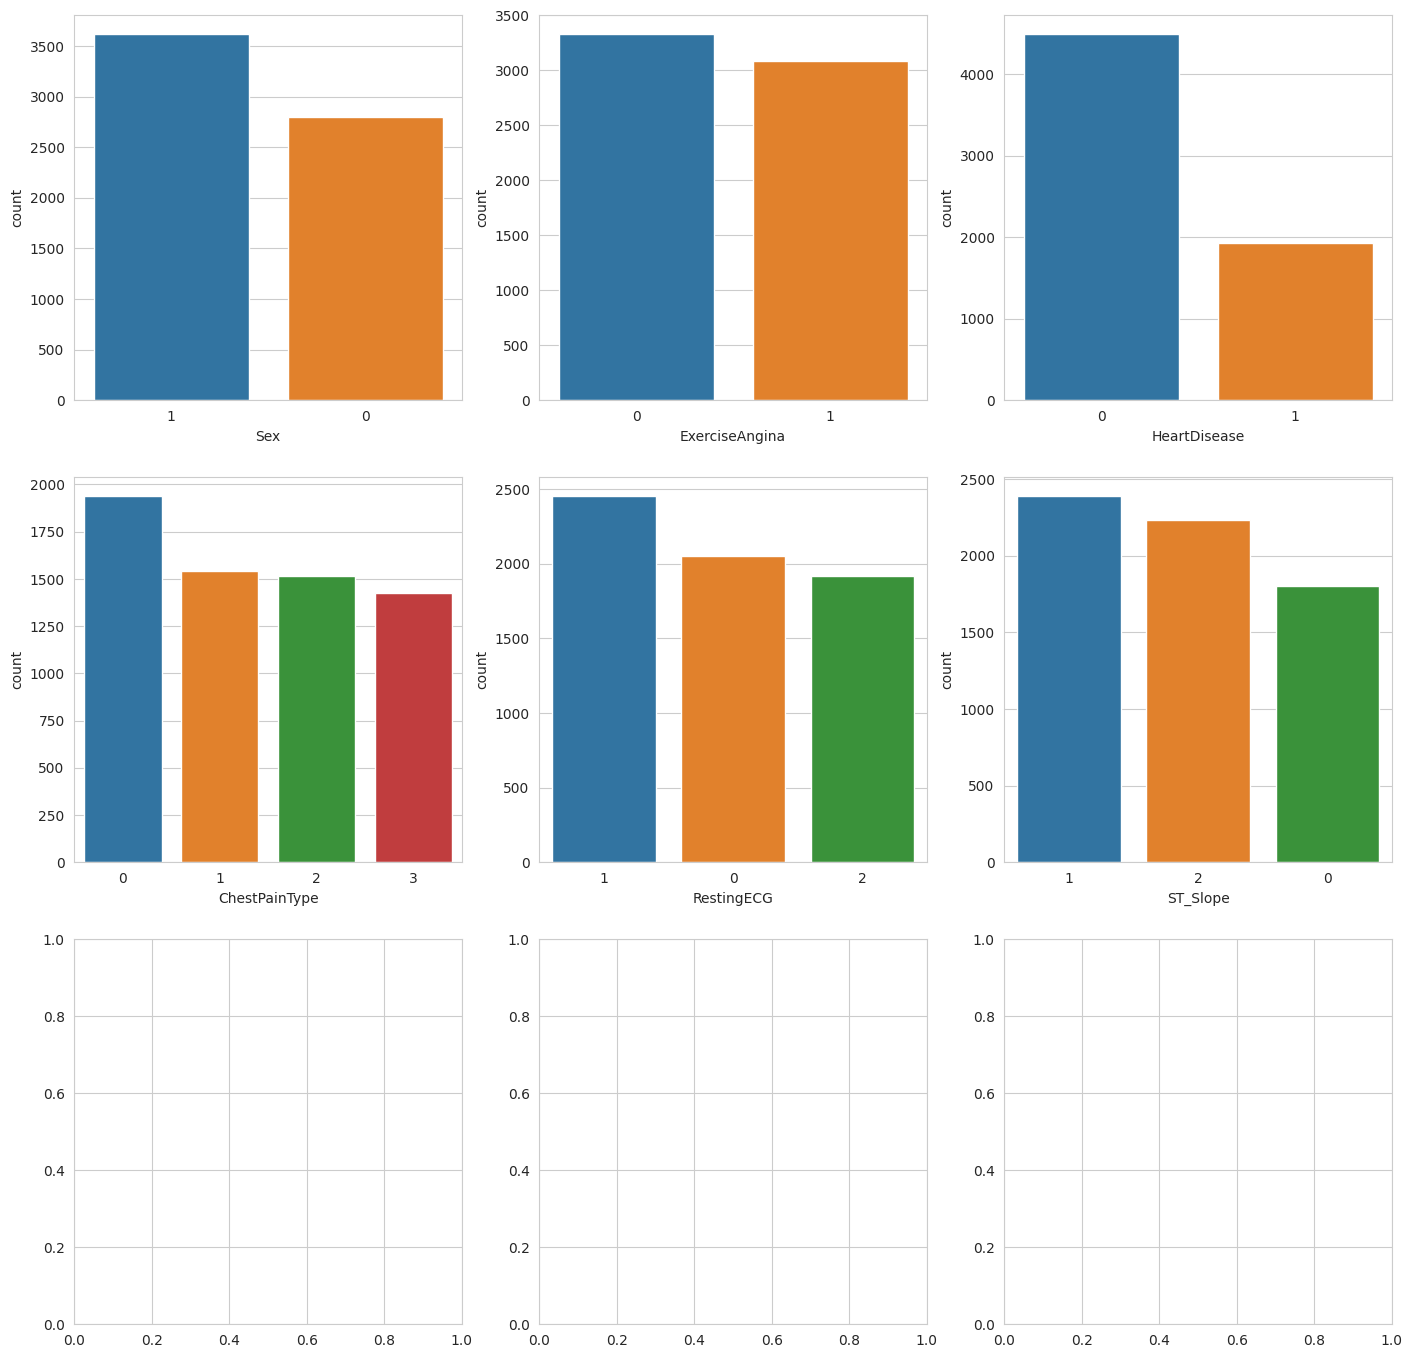

In [ ]:
#plotting Catagorical variable

import matplotlib.pyplot as plt
import seaborn as sns

_, axss = plt.subplots(3, 3, figsize=[17, 17]) # Set canvas
cat_var = ['Sex', 'ExerciseAngina', 'HeartDisease', 'ChestPainType', 'RestingECG', 'ST_Slope']
idx = 0
for var in cat_var:
    i, j = divmod(idx, 3)
    sns.countplot(x=var, data=df, order=df[var].value_counts().index, ax=axss[i, j])
    idx += 1


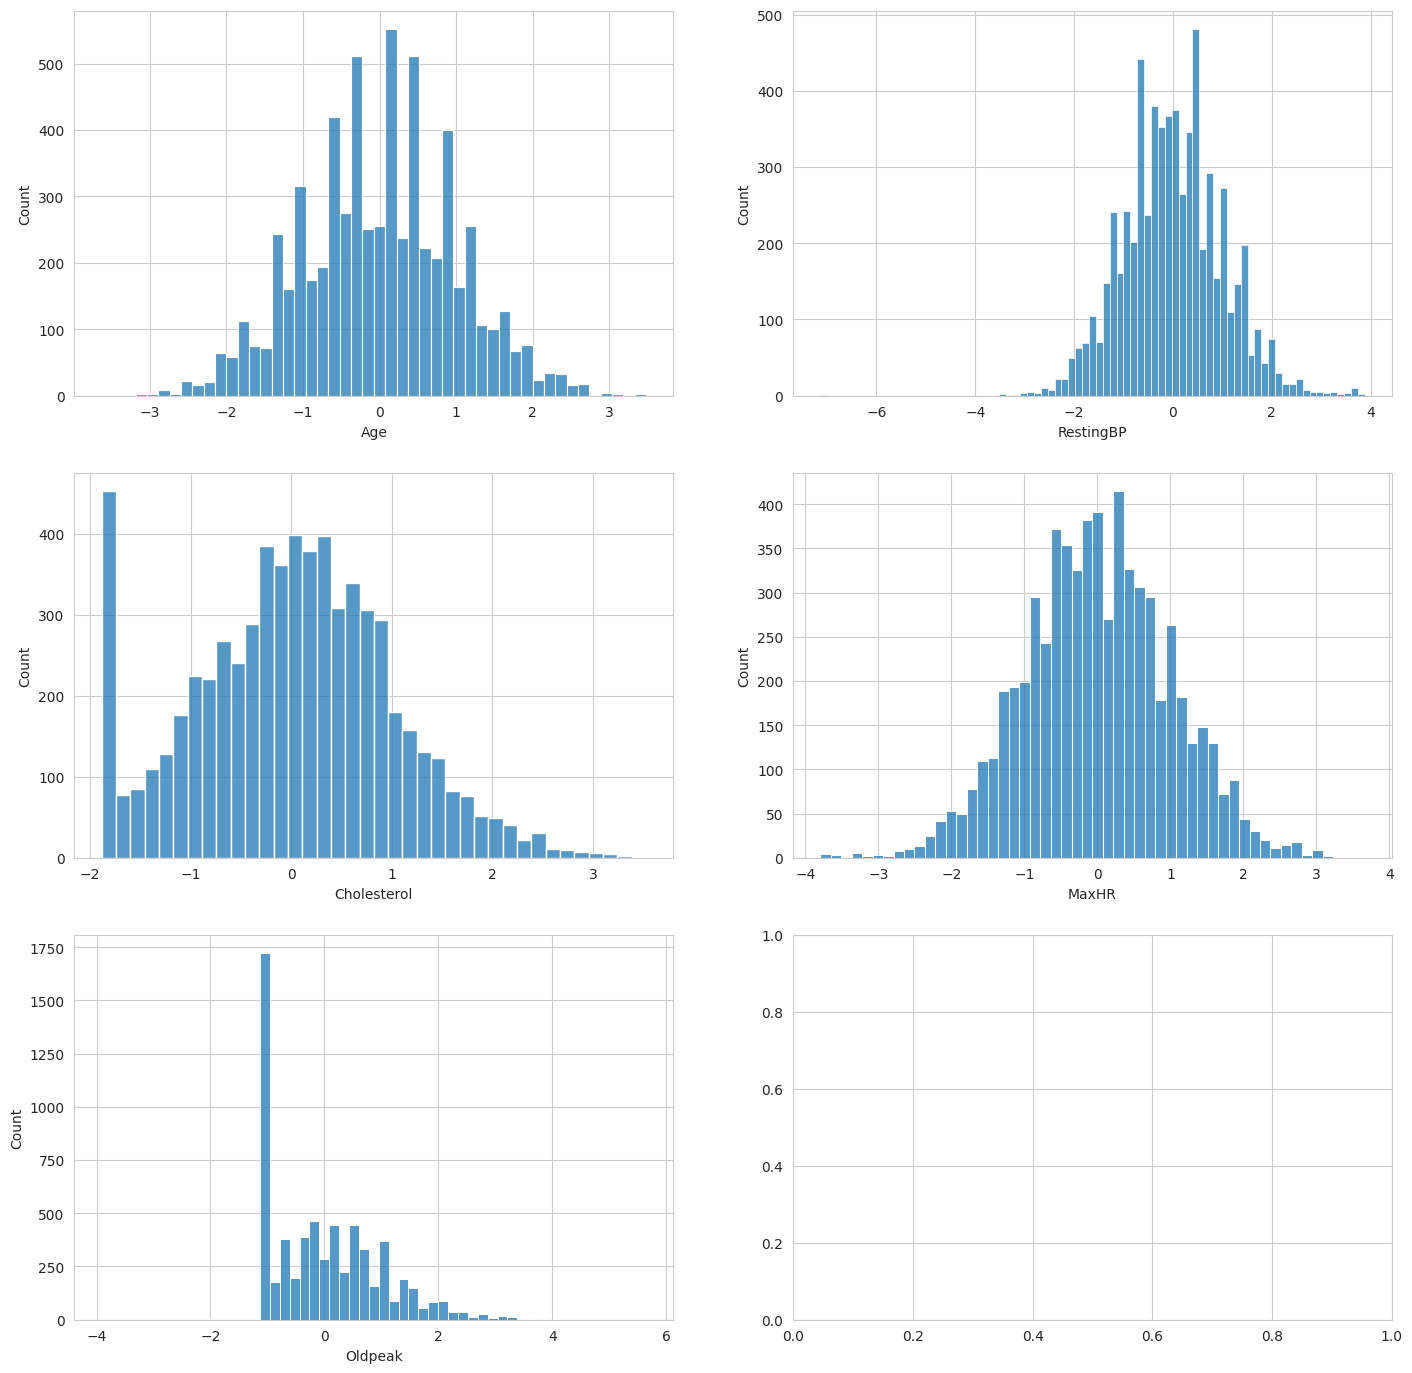

In [ ]:

# for numeric variables
# numeric_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
_,axss = plt.subplots(3,2, figsize=[17,17]) # set canvas
idx = 0
for var in numeric_var:
 sns.histplot(x=var, data= df, ax = axss[idx // 2][idx % 2])
 idx += 1
#1. The distribution of age and thalach are slightly negatively skewed, that of trestbps and
#chols are positively skewed to the different extend. However, that of oldpeak is almost
#exponential.
#2. There are no absolute "outlier" according to the medical use case
#3. See the inter-correlation among variables

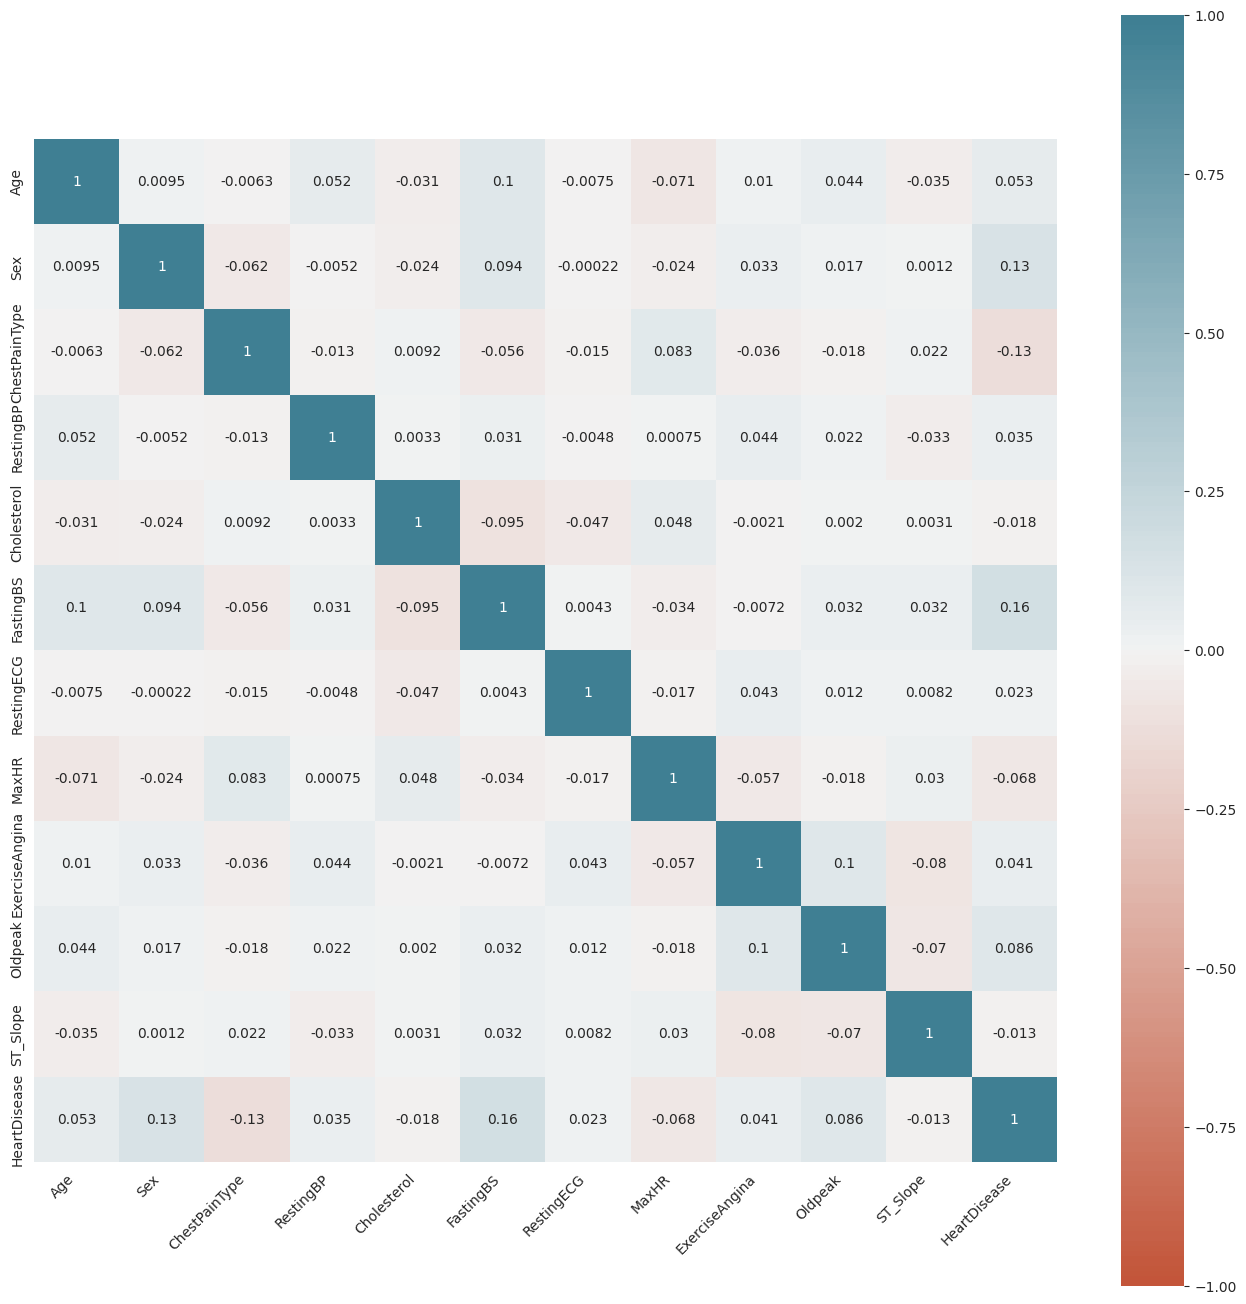

In [ ]:

# the correlation heat map
plt.figure(figsize = (16.5, 16.5))
corr = df.corr()
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot = True
)
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right')
plt.show()
# it seems that 'oldpeak' and 'slope' are highly correlated with each other,
# they are the value derived from EEG (electrocardiogram).
# however, they are not too inter-correlated


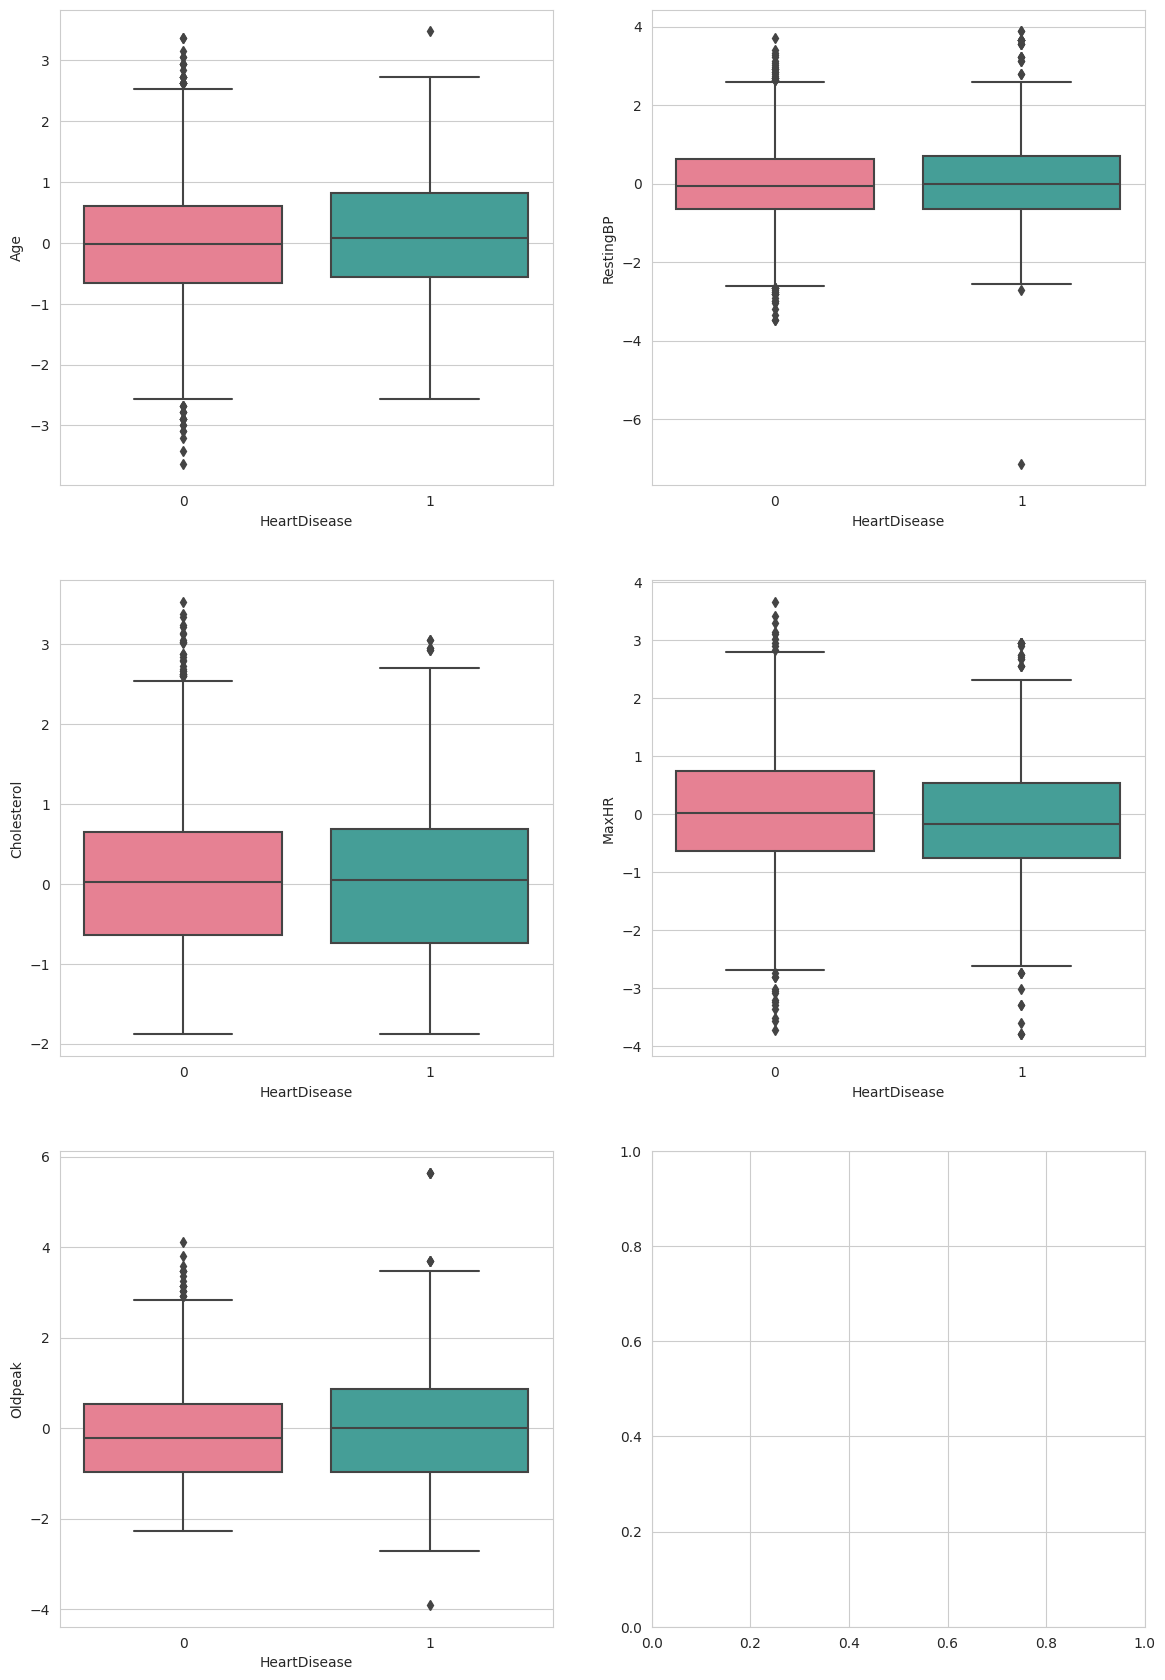

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axss = plt.subplots(3, 2, figsize=[14, 21]) # Set canvas
idx = 0
for var in numeric_var:
    i, j = divmod(idx, 2)  # Calculate the row (i) and column (j) index
    sns.boxplot(x='HeartDisease', y=var, data=df, palette='husl', ax=axss[i , j])
    idx += 1


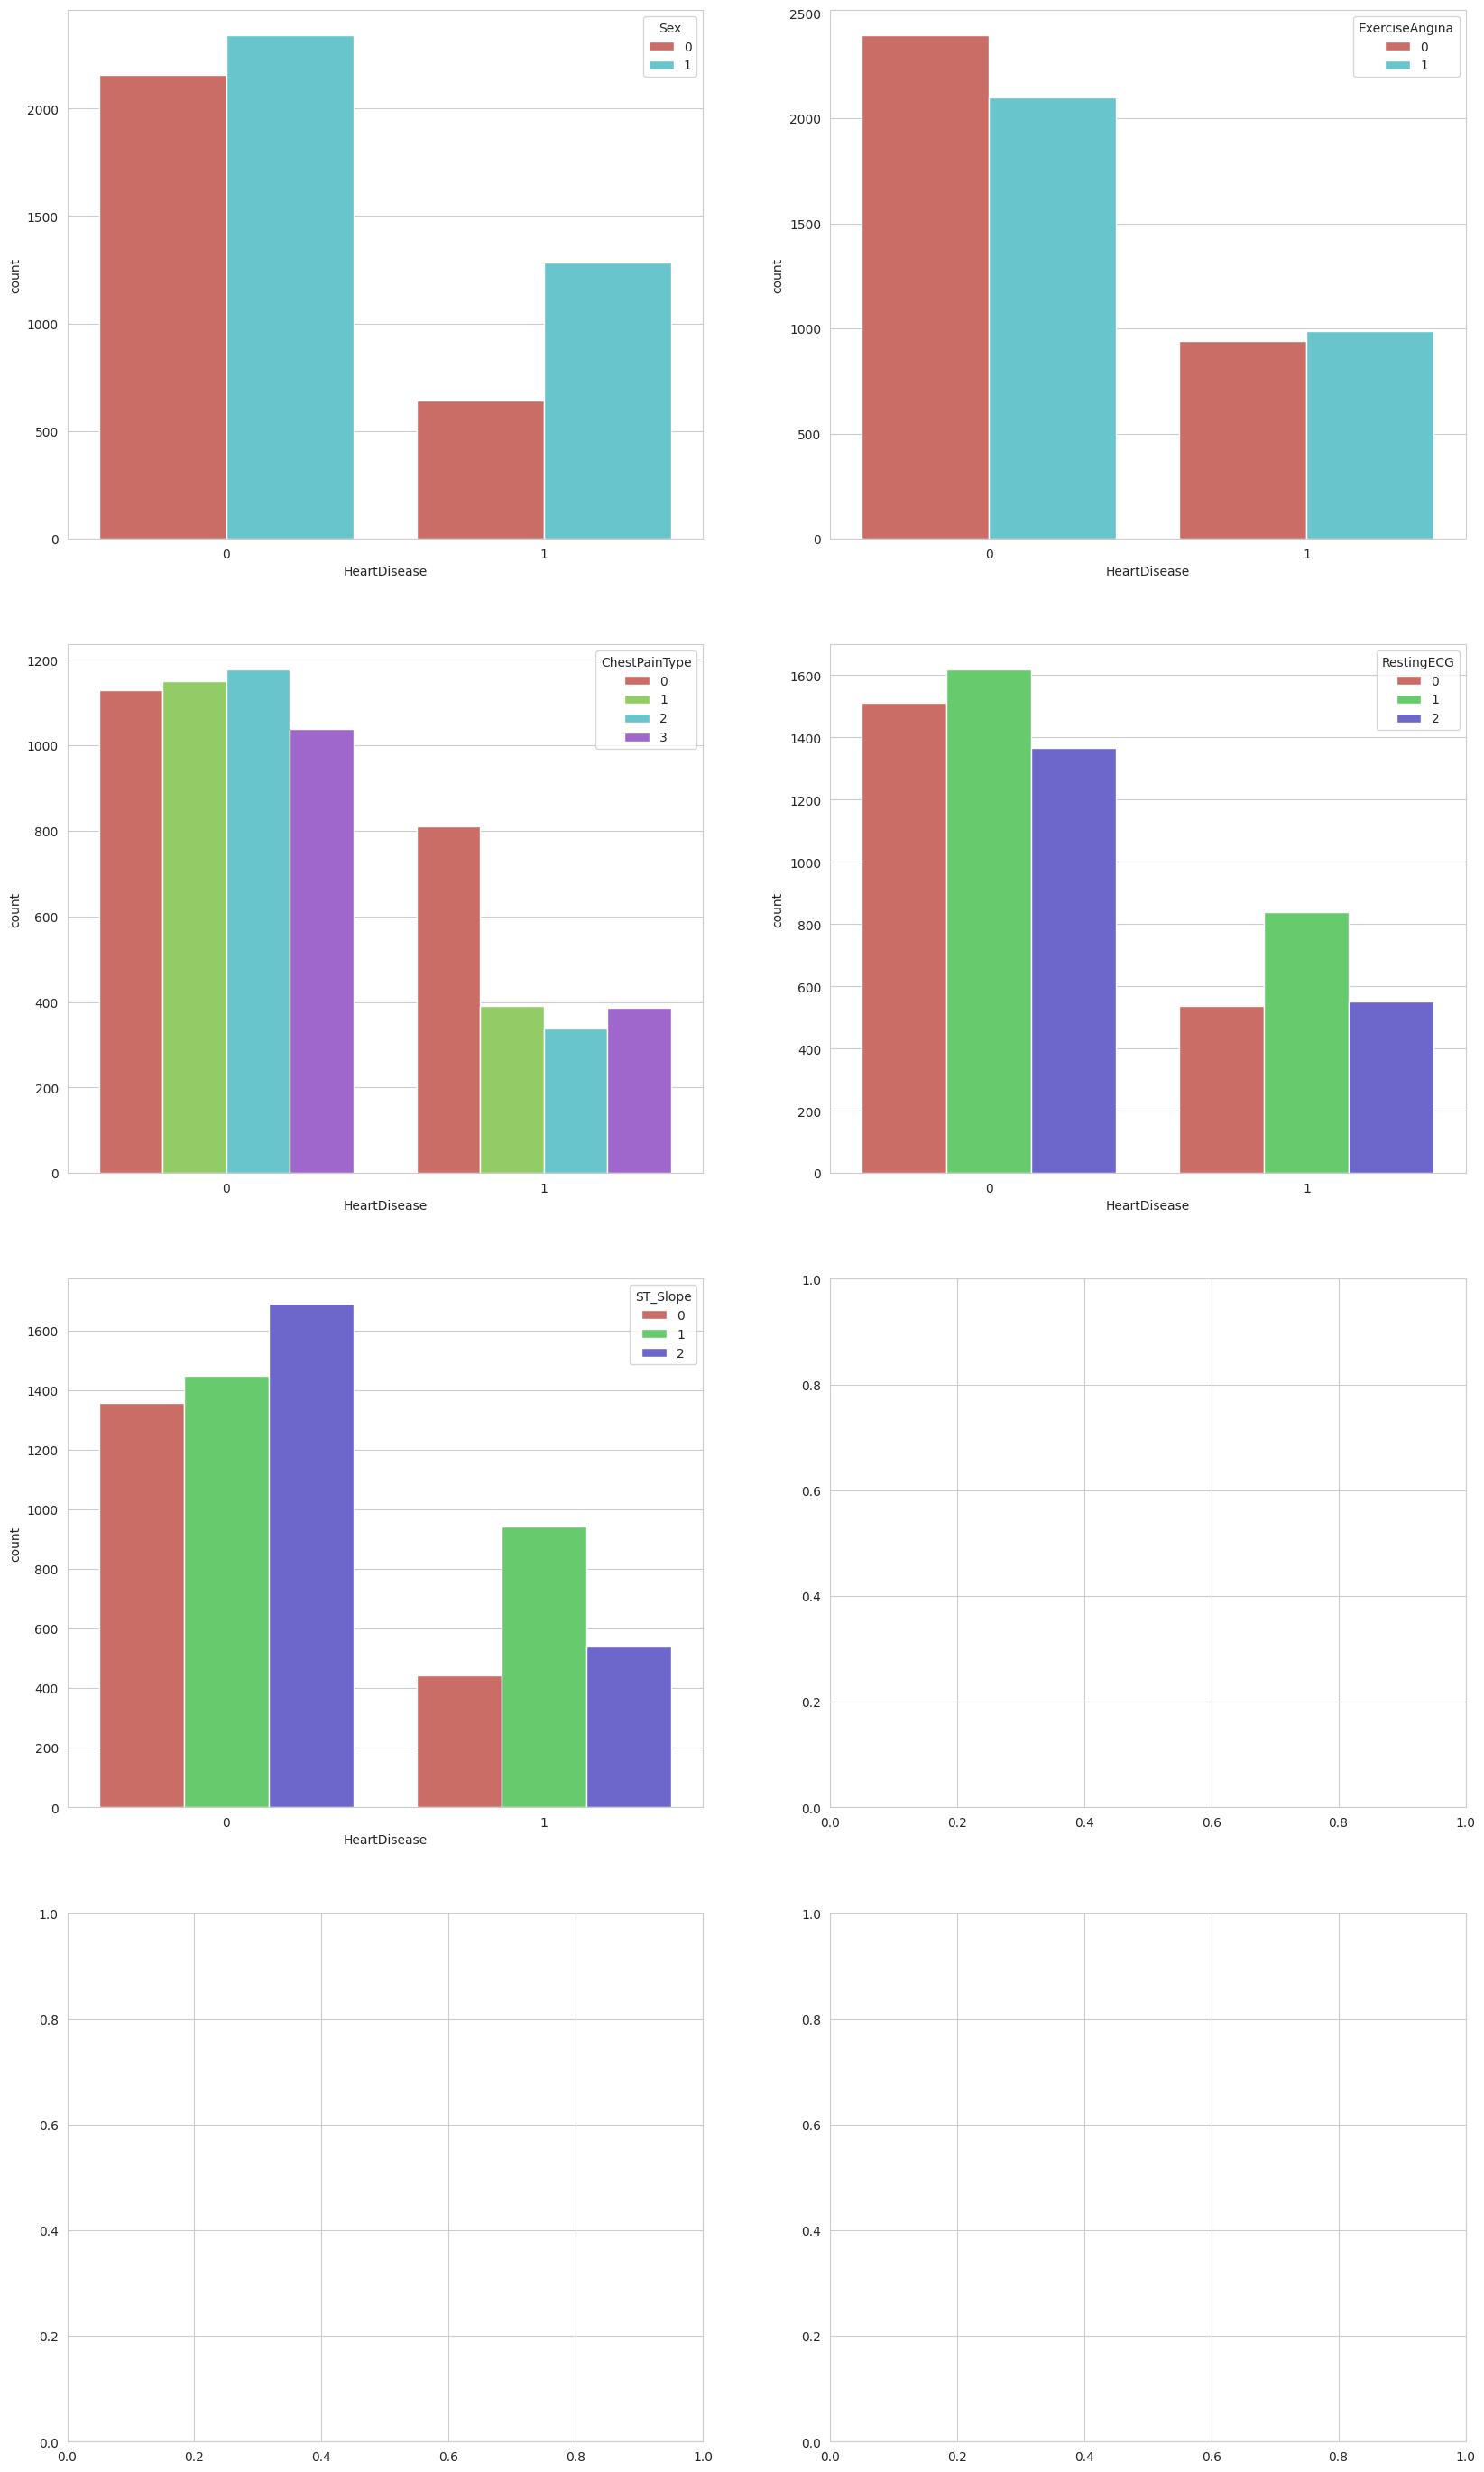

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axss = plt.subplots(4, 2, figsize=[20, 35]) # Set canvas
idx = 0
for var in cat_var:
    if var == 'HeartDisease': continue # Skip the target variable

    i, j = divmod(idx, 2) # Calculate row and column index
    sns.countplot(x='HeartDisease', hue = var, data = df, palette = 'hls', ax = axss[i, j])
    idx += 1

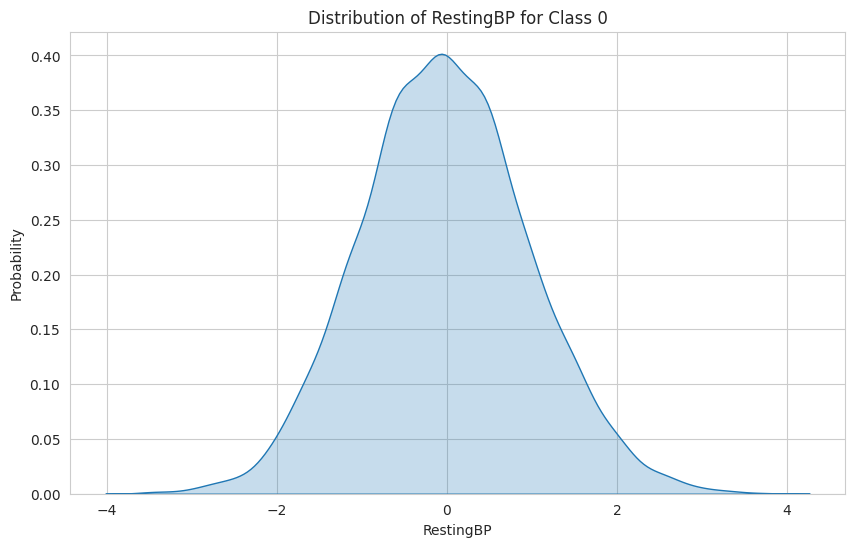

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'RestingBP' and 'HeartDisease' columns
# Filter for class 0 of 'HeartDisease'
class_0_df = df[df['HeartDisease'] == 0]

# Plotting the distribution of RestingBP for class 0
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0_df['RestingBP'], fill=True)
plt.title('Distribution of RestingBP for Class 0')
plt.xlabel('RestingBP')
plt.ylabel('Probability')
plt.show()


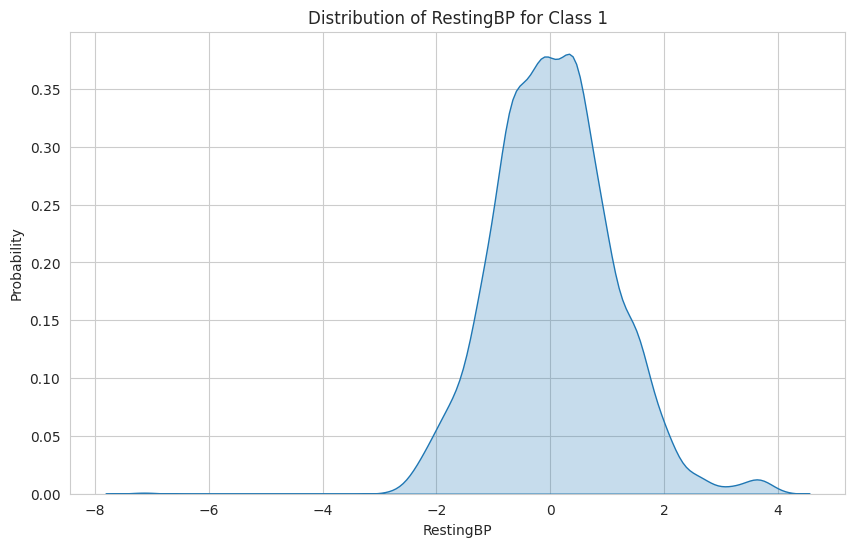

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'RestingBP' and 'HeartDisease' columns
# Filter for class 0 of 'HeartDisease'
class_1_df = df[df['HeartDisease'] == 1]

# Plotting the distribution of RestingBP for class 1
plt.figure(figsize=(10, 6))
sns.kdeplot(class_1_df['RestingBP'], fill=True)
plt.title('Distribution of RestingBP for Class 1')
plt.xlabel('RestingBP')
plt.ylabel('Probability')
plt.show()


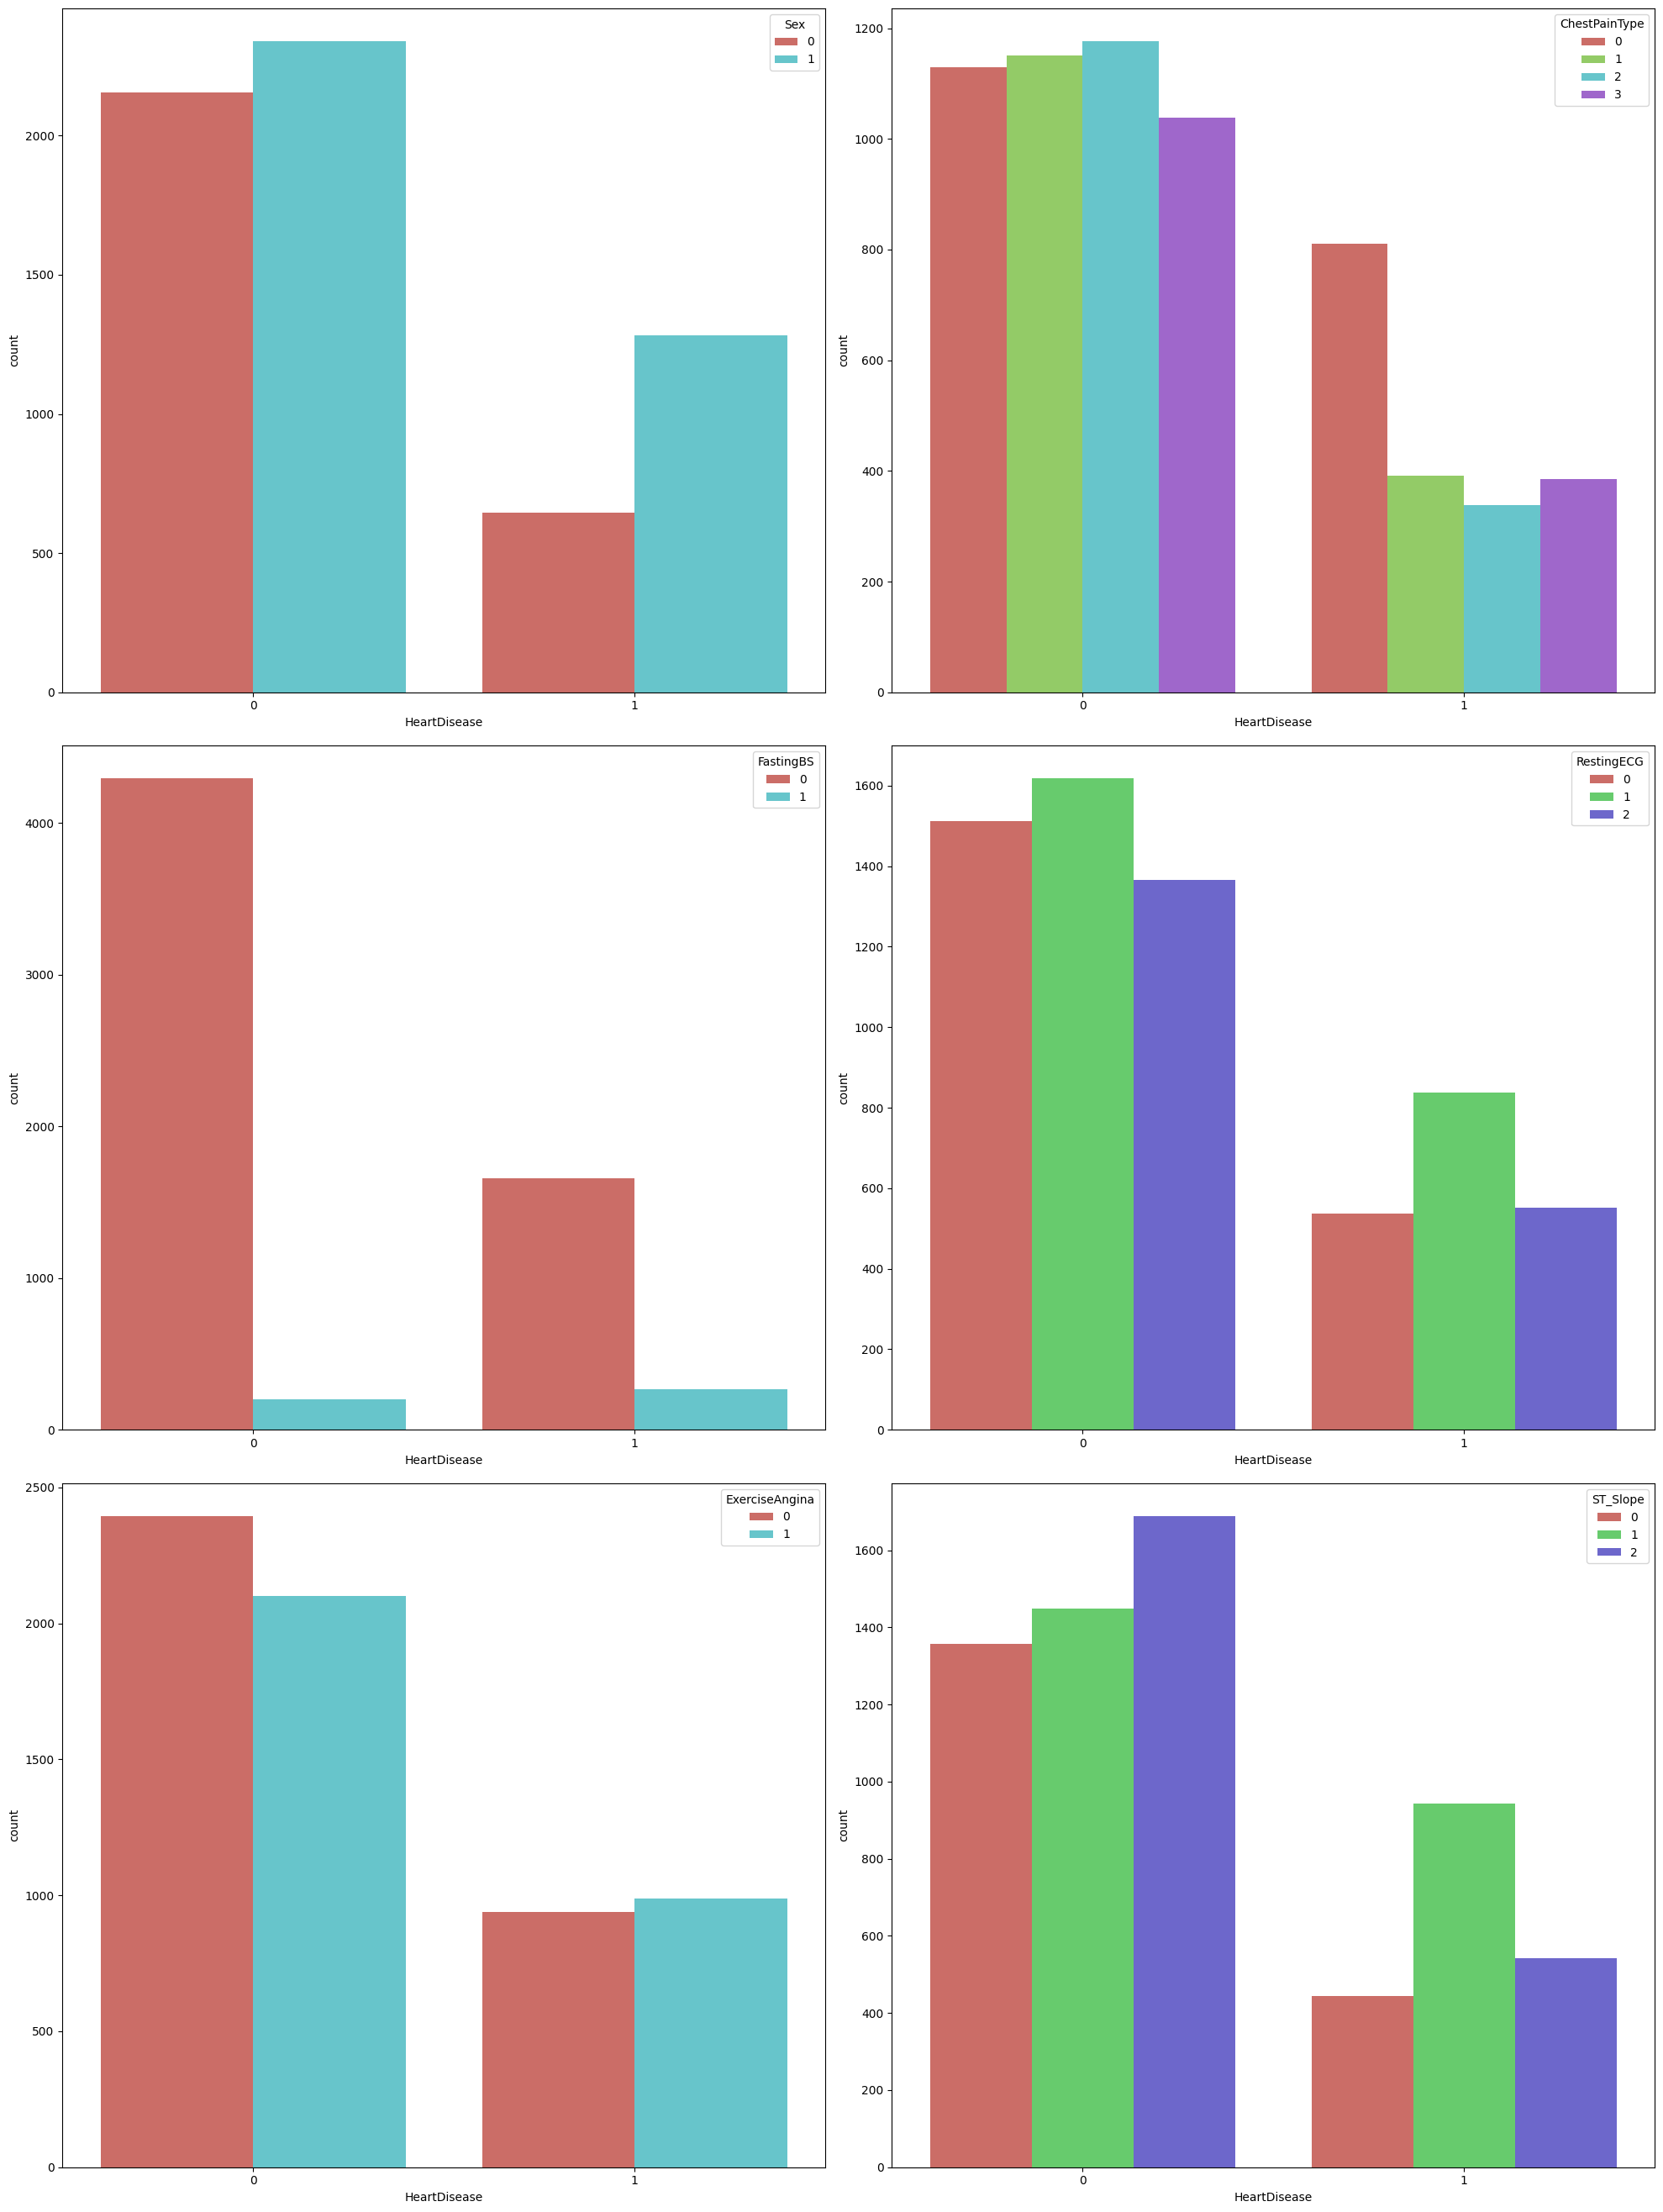

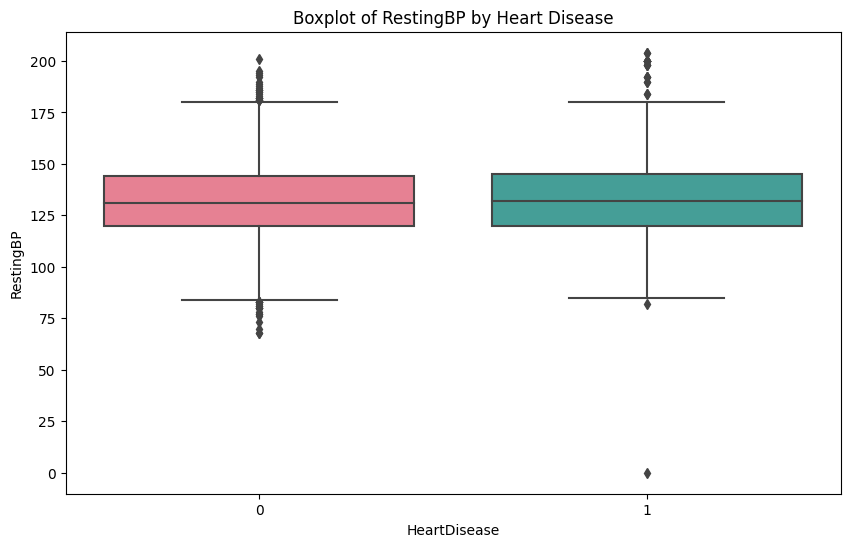

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the DataFrame you have already loaded
# Identify categorical variables
cat_var = [var for var in df.columns if df[var].dtype == 'object' or var in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]  # Example of categorical variables

fig, axss = plt.subplots(4, 2, figsize=[20, 35]) # Set canvas
idx = 0
for var in cat_var:
    if var == 'HeartDisease' or var == 'RestingBP': continue  # Skip these variables

    i, j = divmod(idx, 2) # Calculate row and column index
    sns.countplot(x='HeartDisease', hue=var, data=df, palette='hls', ax=axss[i, j])
    idx += 1

# Adjust layout and remove any unused axes
plt.tight_layout()
for k in range(idx, 8):
    fig.delaxes(axss[divmod(k, 2)])

# If RestingBP is numeric, create a separate boxplot
if 'RestingBP' in df.columns and df['RestingBP'].dtype in ['int64', 'float64']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HeartDisease', y='RestingBP', data=df, palette='husl')
    plt.title('Boxplot of RestingBP by Heart Disease')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X = df.drop('HeartDisease', axis=1)  # Replace 'target' with the actual name of your target variable
y = df['HeartDisease']

# Split the dataset into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# standarize continuous data
from sklearn.preprocessing import StandardScaler
numeric_var
scaler = StandardScaler()
scaler.fit(df[numeric_var])
df[numeric_var] = scaler.transform(df[numeric_var])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.402106,1,1,0.422754,0.811891,0,1,1.411131,0,-1.087796,2,0
1,-1.720460,1,1,-0.117304,0.755932,0,2,-1.508534,0,-1.087796,2,0
2,0.083546,1,2,0.962812,-0.064808,0,1,-0.561615,0,-1.087796,2,0
3,-1.508224,1,2,-0.657362,1.278221,0,1,1.332221,0,-1.087796,2,0
4,-0.871516,0,1,-0.117304,0.326908,0,1,1.332221,0,-1.087796,2,0


In [ ]:
#from sklearn import model_selection
#y = df['HeartDisease']
#x = df.drop('HeartDisease', axis = 1)
#x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size
#stratified sampling
#print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_t
#print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.s


In [ ]:
from sklearn import model_selection

# Define your features and target variable
y = df['HeartDisease']
x = df.drop('HeartDisease', axis=1)

# Split the data into training and testing sets with stratified sampling
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)  # Assuming a 30% test size

# Print the shape of the training and test sets
print('Training data has ' + str(x_train.shape[0]) + ' observations with ' + str(x_train.shape[1]) + ' features.')
print('Test data has ' + str(x_test.shape[0]) + ' observations with ' + str(x_test.shape[1]) + ' features.')


Training data has 5137 observations with 11 features.
Test data has 1285 observations with 11 features.


In [ ]:

#@title build models
# There are three models we are going to use during this project
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# This is for confusion matrix
from sklearn import metrics, model_selection
# Logistic Regression
classifier_logistic = LogisticRegression()
# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()
# Random Forest
classifier_RF = RandomForestClassifier()
# Support Vector Classification
classifier_SVC = SVC(probability=True)
# GB classifier
classifier_GB = GradientBoostingClassifier()
# Gaussian Naive Bayes
classifier_NB = GaussianNB()

**Logistic Regressional Classifier**


Training Accuracy: 72.53%
Test Accuracy: 72.68%
For Logistic Regression Classifier, the accuracy is 72.26% (70.78 ~ 73.74) %


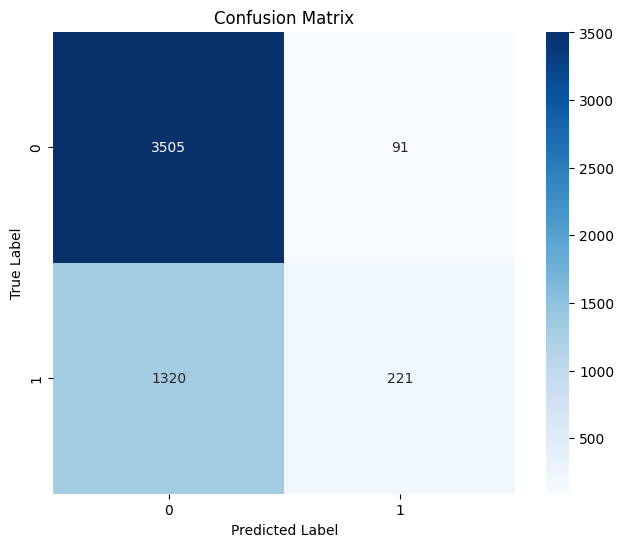

              precision    recall  f1-score   support

           0       0.73      0.97      0.83      3596
           1       0.71      0.14      0.24      1541

    accuracy                           0.73      5137
   macro avg       0.72      0.56      0.54      5137
weighted avg       0.72      0.73      0.65      5137



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt

# Initialize the Logistic Regression Classifier
classifier_logistic = LogisticRegression()

# Train the model
classifier_logistic.fit(x_train, y_train)

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict results
y_predict = classifier_logistic.predict(x_train)

# Cross validation
cv_folds = 5  # Number of folds in cross-validation
scores = model_selection.cross_val_score(classifier_logistic, x_train, y_train, cv=10)
print(f'For Logistic Regression Classifier, the accuracy is {round(scores.mean() * 100, 2)}% ' +
      f'({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)} ~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}) %')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))



**Decision Tree model**

Training Accuracy: 72.53%
Test Accuracy: 72.68%
For Decision Tree Classifier, the accuracy is 72.2% (71.37 ~ 73.03) %


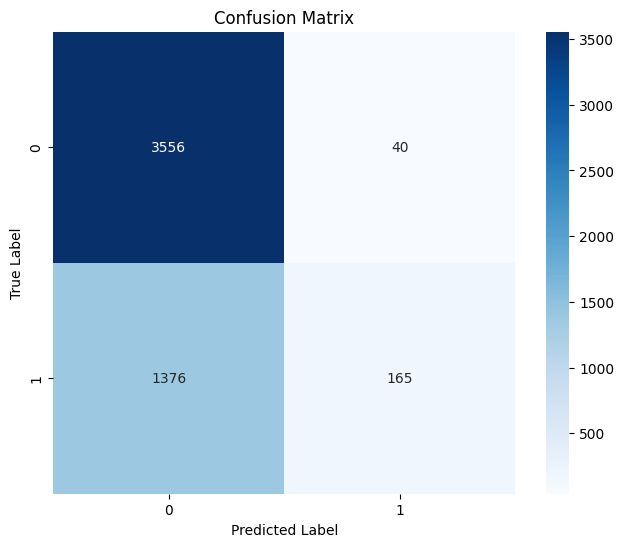

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      3596
           1       0.80      0.11      0.19      1541

    accuracy                           0.72      5137
   macro avg       0.76      0.55      0.51      5137
weighted avg       0.75      0.72      0.64      5137



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
#classifier_dt = DecisionTreeClassifier(random_state=42)

# Install the DecisionTreeClassifier model with pruning
classifier_dt = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2)

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Train the model
classifier_dt.fit(x_train, y_train)

# Predict results on the training set
y_predict = classifier_dt.predict(x_train)

# Cross-validation
cv_folds = 5  # Number of folds in cross-validation
scores = model_selection.cross_val_score(classifier_dt, x_train, y_train, cv=cv_folds)
print(f'For Decision Tree Classifier, the accuracy is {round(scores.mean() * 100, 2)}% ' +
      f'({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)} ~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}) %')

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))


**KNN Classifier**

Training Accuracy: 72.53%
Test Accuracy: 72.68%
For KNN, the acc is 72.12  (70.39 ~ 73.86) %


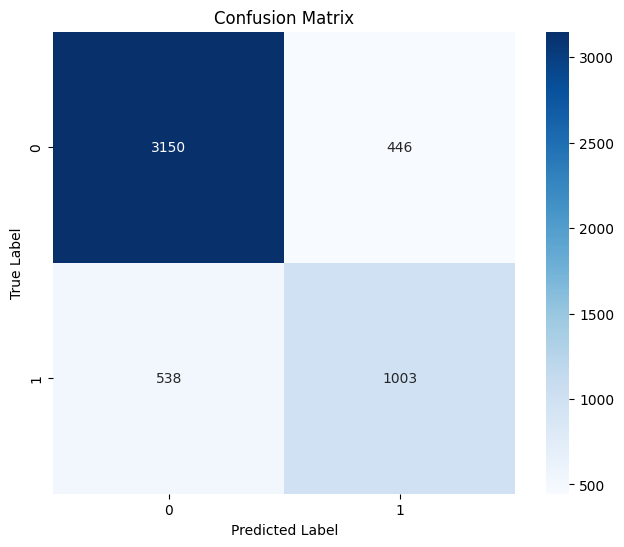

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3596
           1       0.69      0.65      0.67      1541

    accuracy                           0.81      5137
   macro avg       0.77      0.76      0.77      5137
weighted avg       0.81      0.81      0.81      5137



In [ ]:

#@title KNN Classifier
classifier_KNN.fit(x_train, y_train) # train model

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

y_predict = classifier_KNN.predict(x_train) # predict results
# cross validation
scores = model_selection.cross_val_score(classifier_KNN, x_train, y_train, cv = 10)
print(f'For KNN, the acc is {round(scores.mean() * 100, 2)} \
 ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
 ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))

**Random Forest**

Training Accuracy: 72.53%
Test Accuracy: 72.68%
For RF, the acc is 89.96  (87.73 ~ 92.19) %


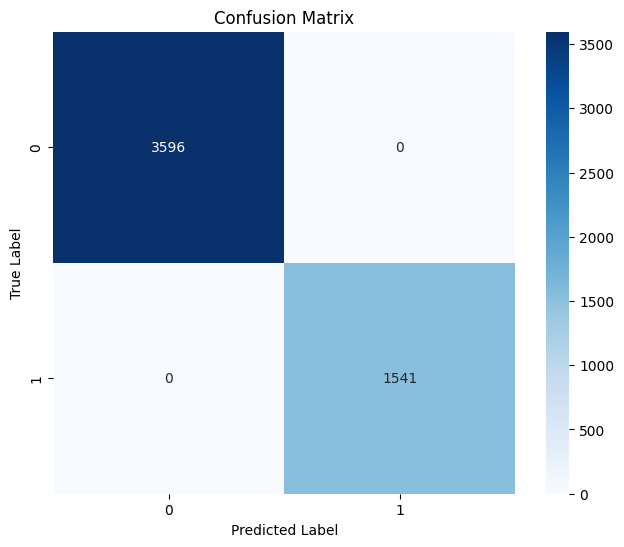

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3596
           1       1.00      1.00      1.00      1541

    accuracy                           1.00      5137
   macro avg       1.00      1.00      1.00      5137
weighted avg       1.00      1.00      1.00      5137



In [ ]:

#@title Random Forest
classifier_RF.fit(x_train, y_train) # train model

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

y_predict = classifier_RF.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_RF, x_train, y_train, cv = 10)
print(f'For RF, the acc is {round(scores.mean() * 100, 2)} \
 ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
 ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))

**SVC**

Training Accuracy: 72.53%
Test Accuracy: 72.68%
For SVC with RBF kernel, the accuracy is 74.34% (72.15 ~ 76.54) %


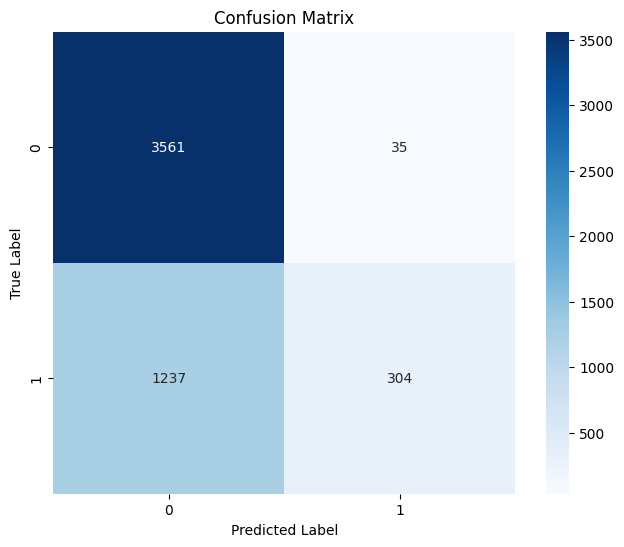

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      3596
           1       0.90      0.20      0.32      1541

    accuracy                           0.75      5137
   macro avg       0.82      0.59      0.59      5137
weighted avg       0.79      0.75      0.69      5137



In [ ]:
from sklearn.svm import SVC
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt

# Initialize the Support Vector Classifier with RBF kernel
classifier_SVC = SVC(kernel='rbf')

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Train the model
classifier_SVC.fit(x_train, y_train)

# Predict results
y_predict = classifier_SVC.predict(x_train)

# Cross validation
scores = model_selection.cross_val_score(classifier_SVC, x_train, y_train, cv=10)
print(f'For SVC with RBF kernel, the accuracy is {round(scores.mean() * 100, 2)}% ' +
      f'({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)} ' +
      f'~ {round(scores.mean() * 100 + scores.std() * 100 * 1.96, 2)}) %')

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))


**GB Classifier**


Training Accuracy: 72.53%
Test Accuracy: 72.68%
For GB Classifier, the acc is 75.32  (72.81 ~ 77.83) %


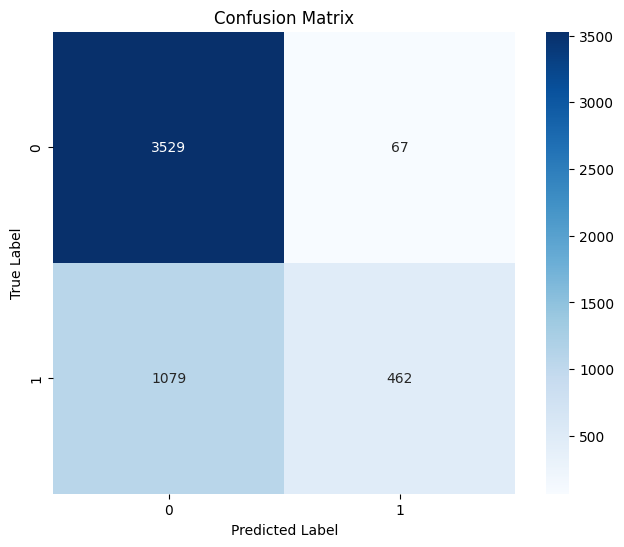

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      3596
           1       0.87      0.30      0.45      1541

    accuracy                           0.78      5137
   macro avg       0.82      0.64      0.65      5137
weighted avg       0.80      0.78      0.74      5137



In [ ]:

#@title GB Classifier
classifier_GB.fit(x_train, y_train) # train model

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

y_predict = classifier_GB.predict(x_train) # predict results
# cross validation
scores = model_selection.cross_val_score(classifier_GB, x_train, y_train, cv = 10)
print(f'For GB Classifier, the acc is {round(scores.mean() * 100, 2)} \
 ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
 ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))


**Naive Bayes**

Training Accuracy: 72.53%
Test Accuracy: 72.68%
For Naive Bayes Classifier, the acc is 71.62  (69.86 ~ 73.38000000000001) %


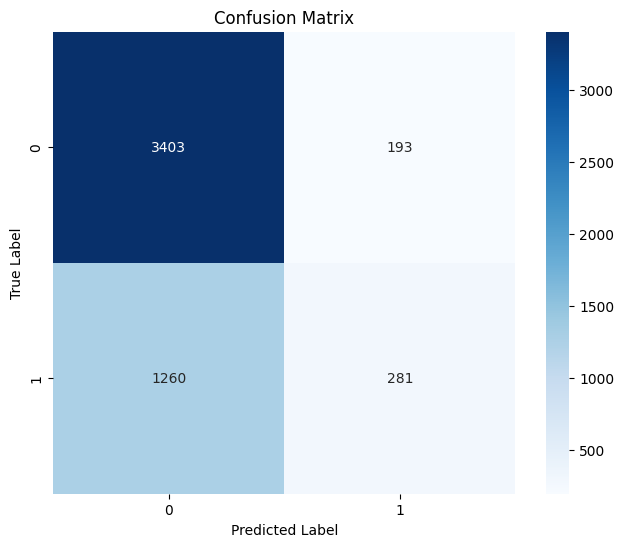

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      3596
           1       0.59      0.18      0.28      1541

    accuracy                           0.72      5137
   macro avg       0.66      0.56      0.55      5137
weighted avg       0.69      0.72      0.66      5137



In [ ]:
classifier_NB.fit(x_train, y_train, sample_weight=None) # train model

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

y_predict = classifier_NB.predict(x_train) # predict results
# cross validation
scores = model_selection.cross_val_score(classifier_NB, x_train, y_train, cv = 10)
print(f'For Naive Bayes Classifier, the acc is {round(scores.mean() * 100, 2)} \
 ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
 ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_train, y_predict)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_train, y_predict))

**Naive Bayes With Independance of Examples**

Training Accuracy: 67.30%
Test Accuracy: 67.00%
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       897
           1       0.65      0.20      0.31       388

    accuracy                           0.73      1285
   macro avg       0.69      0.58      0.57      1285
weighted avg       0.71      0.73      0.67      1285



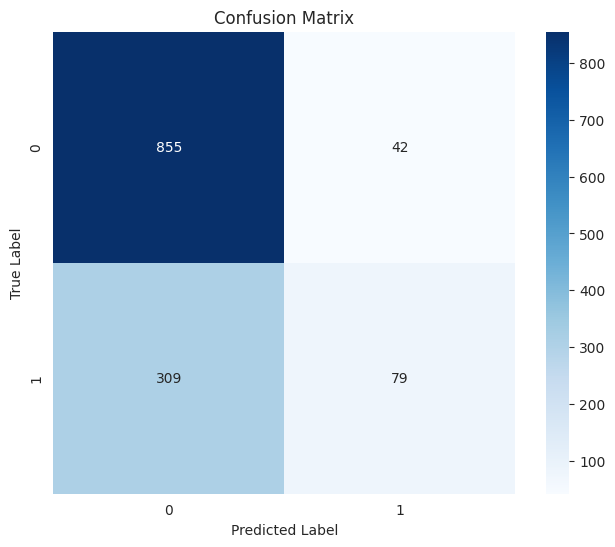

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # for Gaussian Naive Bayes
from sklearn import metrics

# Example data loading step
# X, y = load_your_data()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict results on training data
y_train_predict = classifier_logistic.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Predict results on test data
y_test_predict = classifier_logistic.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Initialize the classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Classification Report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


**Optimize Hyperparameters**

In [ ]:

#@title Preload
from sklearn.model_selection import GridSearchCV

# Helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print("Best score: " + str(gs.best_score_))
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ': ' + str(best_parameters[param_name]))


**Model 1 - Logistic Regression**

In [ ]:
parameters = {
 'penalty':('l2','l1'),
 'C':(0.036, 0.037, 0.038, 0.039, 0.040, 0.041, 0.042)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 10)
Grid_LR.fit(x_train, y_train)
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)


Best score: 0.7266836568290592
Best parameters set:
C: 0.041
penalty: l2


The test accuracy of the "best" model for logistic regression is 0.6715953307392996


<ipython-input-141-294f993b1699>:17: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')


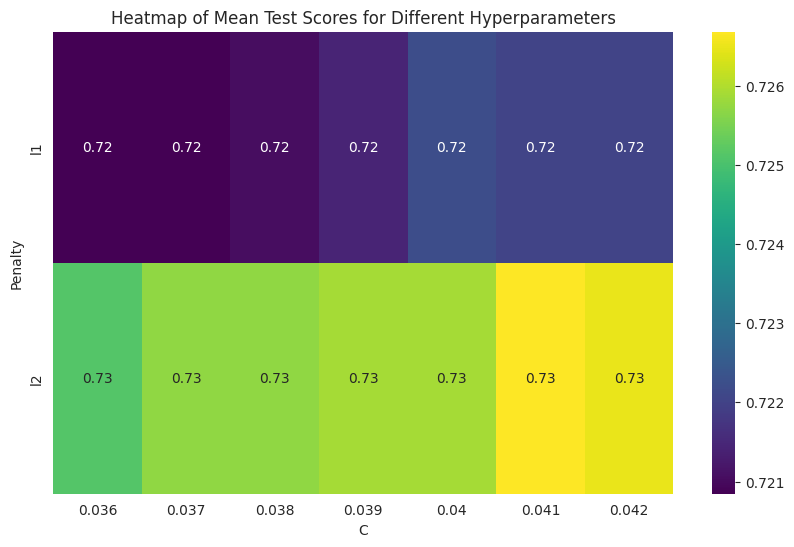

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

# Assuming Grid_LR is your trained GridSearchCV object for logistic regression
best_LR_model = Grid_LR.best_estimator_

# Make predictions with the best model
y_pred = best_LR_model.predict(x_test)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of the "best" model for logistic regression is', test_accuracy)

# Mapping the relationship between each parameter and the corresponding accuracy
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(res, cmap='viridis', annot=True)  # 'annot=True' will add the annotations
plt.title('Heatmap of Mean Test Scores for Different Hyperparameters')
plt.xlabel('C')
plt.ylabel('Penalty')
plt.show()


**Model 2 - KNN Model**

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Function to print grid search metrics
def print_grid_search_metrics(gs):
    print("Best score: " + str(gs.best_score_))
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ': ' + str(best_parameters[param_name]))

# Start timing
start = time.time()

# Define parameters for KNN
parameters = {
    'n_neighbors': [7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 2, 3, 4, 5, 6, 7],
}

# Perform Grid Search
Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
Grid_KNN.fit(x_train, y_train)

# Print the best hyperparameter combination
print_grid_search_metrics(Grid_KNN)

# End timing
end = time.time()

# Calculate and print the average time per parameter attempt
total_combinations = len(parameters['n_neighbors']) * len(parameters['weights']) * len(parameters['leaf_size'])
print(f'For KNN, it took {(end - start) / total_combinations} seconds per parameter attempt')


Best score: 0.8555570725343407
Best parameters set:
leaf_size: 1
n_neighbors: 14
weights: distance
For KNN, it took 1.6368687266395205 seconds per parameter attempt


In [ ]:
# Assuming Grid_KNN is your trained GridSearchCV object for KNN
best_KNN_model = Grid_KNN.best_estimator_

# Optionally, predict the results (if you need them for something else)
y_pred = best_KNN_model.predict(x_test)

# Calculate the test accuracy
test_accuracy = best_KNN_model.score(x_test, y_test)
print('The test accuracy of the "best" model for KNN is', test_accuracy)


# Model 3 - RF


In [ ]:
# timing
start = time.time()
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
 'n_estimators' : [65, 64, 63, 62, 61, 60],
 'max_depth': [8,9,10,11]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(x_train, y_train)
# the best hyperparameter combination
print_grid_search_metrics(Grid_RF)
end = time.time()
print(f'For Random Forest, it took {(end - start)/(6 * 4)} seconds per parameter attempt')

Best score: 0.816235844691712
Best parameters set:
max_depth: 11
n_estimators: 62
For Random Forest, it took 4.42151615023613 seconds per parameter attempt


In [ ]:
best_RF_model = Grid_RF.best_estimator_
y_pred = best_RF_model.predict(x_test)
test_accuracy = best_RF_model.score(x_test, y_test)
print('The test accuracy of the "best" model for RF is', test_accuracy)


The test accuracy of the "best" model for RF is 0.8217898832684825


**Model 4 - SVC**

In [ ]:
# timing
start = time.time()
# Possible hyperparamter options for SVC
parameters = {
 'C' : [9, 10, 11, 12],
 'degree': [0,1,2],
}
Grid_SVC = GridSearchCV(SVC(probability = True), parameters, cv=10)
Grid_SVC.fit(x_train, y_train)
# the best hyperparameter combination
print_grid_search_metrics(Grid_SVC)
end = time.time()
print(f'For SVC, it took {(end - start)/(4 * 3)} seconds per parameter attempt')


In [ ]:
# Assuming Grid_KNN is your trained GridSearchCV object for KNN
best_Grid_SVC_model =  Grid_SVC.best_estimator_

# Optionally, predict the results (if you need them for something else)
y_pred = best_Grid_SVC_model.predict(x_test)

# Calculate the test accuracy
test_accuracy = best_Grid_SVC_model.score(x_test, y_test)
print('The test accuracy of the "best" model for Grid_SVC is', test_accuracy)

The test accuracy of the "best" model for Grid_SVC is 0.778988326848249


**Model 5 - GB Classifier**

In [ ]:

# Possible hyperparamter options for GB Classifier
parameters = {
 'learning_rate' : [0.8, 0.9, 1.0],
 'n_estimators': [63, 64, 65],
 'subsample': [0.95, 1.0, 1.05],
 'min_samples_split':[0.725, 0.75, 0.775]
}
Grid_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10)
Grid_GB.fit(x_train, y_train)
# the best hyperparameter combination
print_grid_search_metrics(Grid_GB)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best score: 0.7533536608490531
Best parameters set:
learning_rate: 0.9
min_samples_split: 0.775
n_estimators: 65
subsample: 1.0


In [ ]:
# Assuming Grid_GB is your trained GridSearchCV object for Gradient Boosting
best_GB_model = Grid_GB.best_estimator_

# Optionally, predict the results (if you need them for something else)
y_pred = best_GB_model.predict(x_test)

# Calculate the test accuracy
test_accuracy = best_GB_model.score(x_test, y_test)
print('The test accuracy of the "best" model for GB classifier is', test_accuracy)


The test accuracy of the "best" model for GB classifier is 0.7470817120622568


**Model 6 - Gaussian Naive Bayes**

In [ ]:

# Possible hyperparamter options for Gaussian Naive Bayes
parameters = {
 'var_smoothing' : [0.17, 0.18, 0.19],
}
Grid_NB = GridSearchCV(GaussianNB(), parameters, cv=10)
Grid_NB.fit(x_train, y_train)
# the best hyperparameter combination
print_grid_search_metrics(Grid_NB)

Best score: 0.7286303198549768
Best parameters set:
var_smoothing: 0.17


In [ ]:
# Assuming Grid_GB is your trained GridSearchCV object for Gradient Boosting
best_NB_model = Grid_GB.best_estimator_

# Optionally, predict the results (if you need them for something else)
y_pred = best_NB_model.predict(x_test)

# Calculate the test accuracy
test_accuracy = best_NB_model.score(x_test, y_test)
print('The test accuracy of the "best" model for NB classifier is', test_accuracy)

The test accuracy of the "best" model for NB classifier is 0.7470817120622568


# Model Evaluation - Confusion Matrix (Precision,
Recall, Accuracy, f1-Score)

**Precision**(PPV, positive predictive value): tp / (tp + fp); High Precision means low fp

**Recall**(sensitivity, hit rate, true positive rate): tp / (tp + fn)

**Accurracy**: (tp + tn) / (tp + tn + fp + fn)
f1-Score: (2 * P * R) / (P + R)

**Model 1 - Logistic Regression**


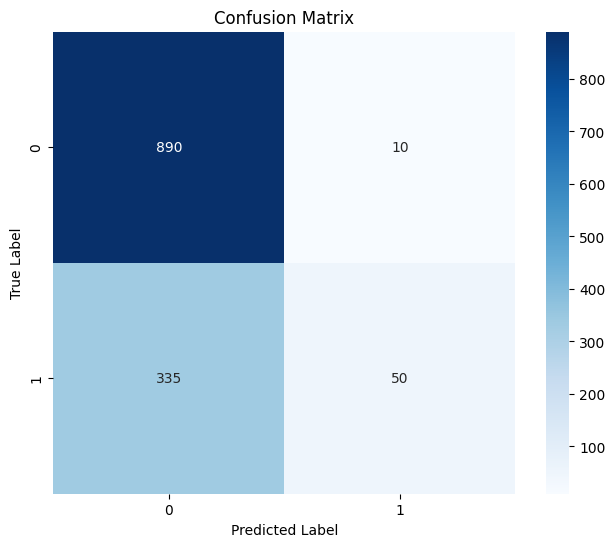

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       900
           1       0.83      0.13      0.22       385

    accuracy                           0.73      1285
   macro avg       0.78      0.56      0.53      1285
weighted avg       0.76      0.73      0.65      1285



In [ ]:
# Assuming y_train and y_predict are already defined
cm = metrics.confusion_matrix(y_test, best_LR_model.predict(x_test))

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(metrics.classification_report(y_test, best_LR_model.predict(x_test)))

**Model 2 - KNN Model**

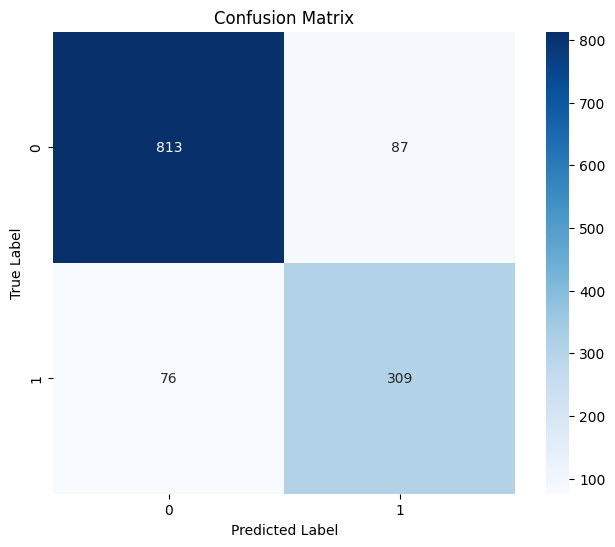

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       900
           1       0.78      0.80      0.79       385

    accuracy                           0.87      1285
   macro avg       0.85      0.85      0.85      1285
weighted avg       0.87      0.87      0.87      1285



In [ ]:

cm = metrics.confusion_matrix(y_test, best_KNN_model.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
print(metrics.classification_report(y_test, best_KNN_model.predict(x_test)))

**Model 3 - RF**

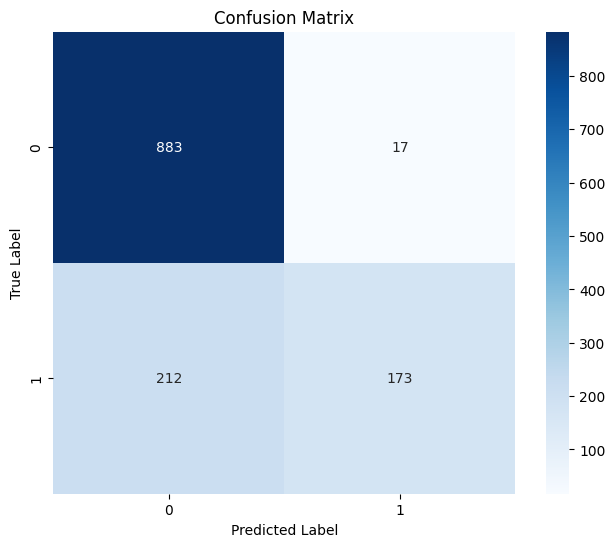

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       900
           1       0.91      0.45      0.60       385

    accuracy                           0.82      1285
   macro avg       0.86      0.72      0.74      1285
weighted avg       0.84      0.82      0.80      1285



In [ ]:

cm = metrics.confusion_matrix(y_test, best_RF_model.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
print(metrics.classification_report(y_test, best_RF_model.predict(x_test)))

**Model 4 - SVC**


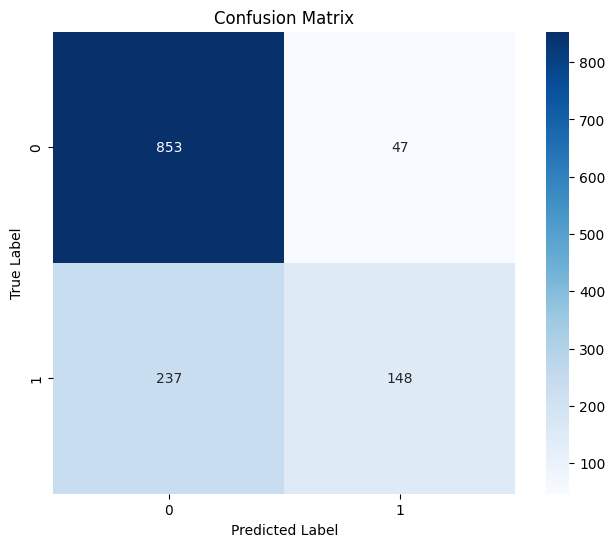

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       900
           1       0.76      0.38      0.51       385

    accuracy                           0.78      1285
   macro avg       0.77      0.67      0.68      1285
weighted avg       0.78      0.78      0.75      1285



In [ ]:

cm = metrics.confusion_matrix(y_test, best_Grid_SVC_model.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
print(metrics.classification_report(y_test, best_Grid_SVC_model.predict(x_test)))

**Model 5 - GB Classifier**

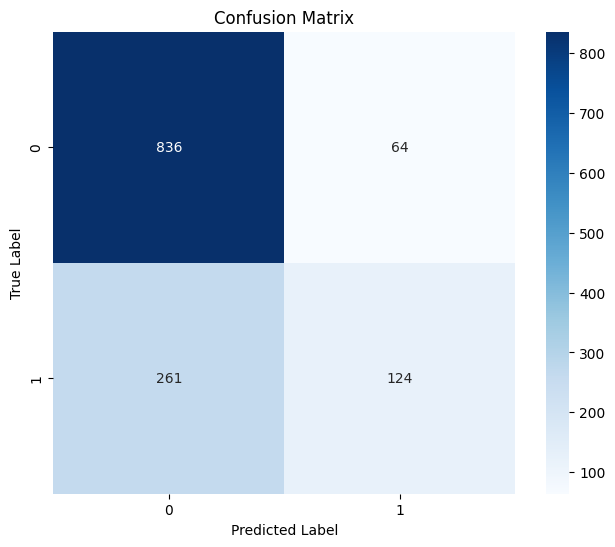

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       900
           1       0.66      0.32      0.43       385

    accuracy                           0.75      1285
   macro avg       0.71      0.63      0.64      1285
weighted avg       0.73      0.75      0.72      1285



In [ ]:
cm = metrics.confusion_matrix(y_test, best_GB_model.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
print(metrics.classification_report(y_test, best_GB_model.predict(x_test)))


**Model 6 - Guassian Naive Bayes**

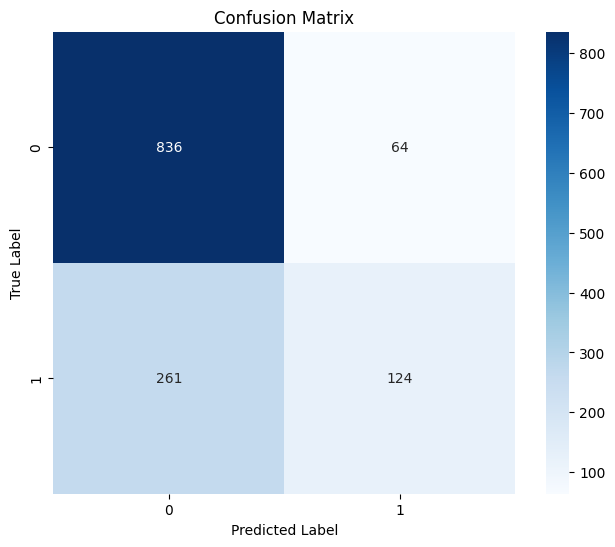

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       900
           1       0.66      0.32      0.43       385

    accuracy                           0.75      1285
   macro avg       0.71      0.63      0.64      1285
weighted avg       0.73      0.75      0.72      1285



In [ ]:

cm = metrics.confusion_matrix(y_test, best_NB_model.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
print(metrics.classification_report(y_test, best_NB_model.predict(x_test)))

# Model Evaluation - ROC & AUC

All the classifier used here have predict_prob() function, generating the corresponding
prediction probability of the classification as category "1"

In [ ]:

from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics

**Model 1 - Logistic Regression**

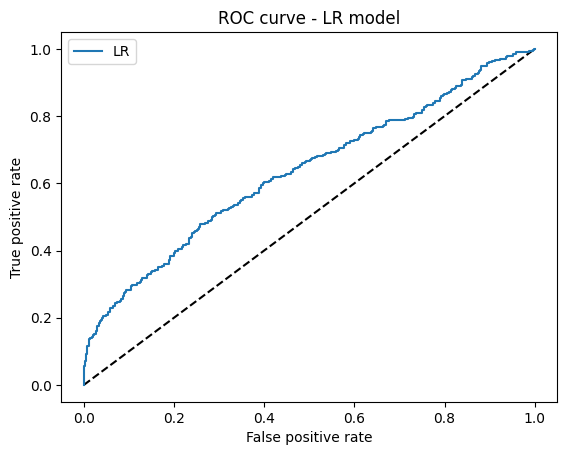

The AUC of LR model is 0.6335468975468976


In [ ]:

# Use predict_proba to get the probability results of LR
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()
# AUC
print('The AUC of LR model is', metrics.auc(fpr_lr,tpr_lr))

**Model 2 - KNN**

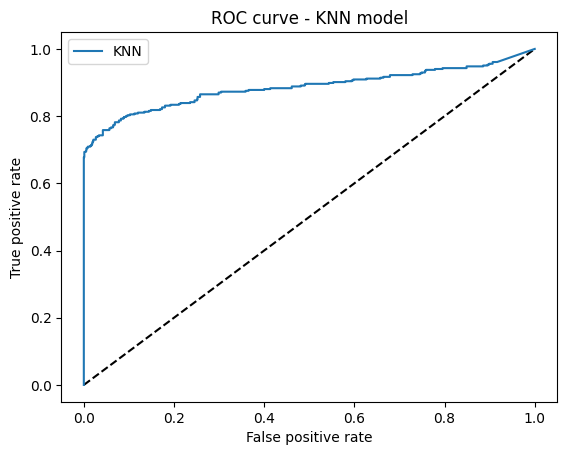

The AUC of KNN model is 0.8850606060606061


In [ ]:

# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN model')
plt.legend(loc='best')
plt.show()
# AUC
print('The AUC of KNN model is', metrics.auc(fpr_knn,tpr_knn))

**Model 3 - Random Forest**

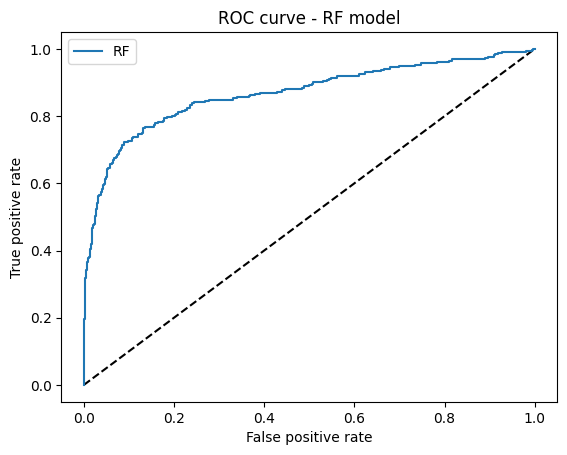

The AUC of RF model is 0.8671428571428573


In [ ]:

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()
# AUC
print('The AUC of RF model is', metrics.auc(fpr_rf,tpr_rf))

**Model 4 - SVC**

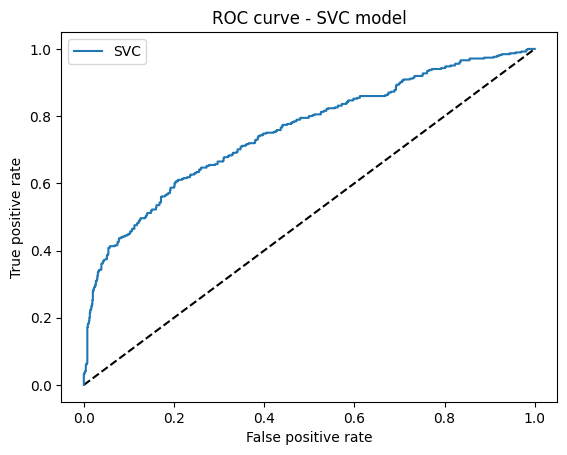

The AUC of SVC model is 0.7534747474747475


In [ ]:

# Use predict_proba to get the probability results of SVC
y_pred_svc = best_Grid_SVC_model.predict_proba(x_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)
# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVC model')
plt.legend(loc='best')
plt.show()
# AUC
print('The AUC of SVC model is', metrics.auc(fpr_svc,tpr_svc))

**Model 5 - GB Classifier**

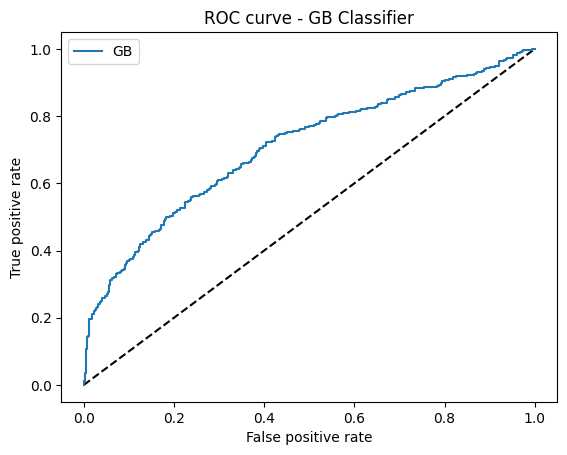

The AUC of GB Classifier is 0.7073477633477634


In [ ]:

# Use predict_proba to get the probability results of GB Classifier
y_pred_gb = best_GB_model.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - GB Classifier')
plt.legend(loc='best')
plt.show()
# AUC
print('The AUC of GB Classifier is', metrics.auc(fpr_gb,tpr_gb))

**Model 6 - Gaussian Naive Bayes Classifier**

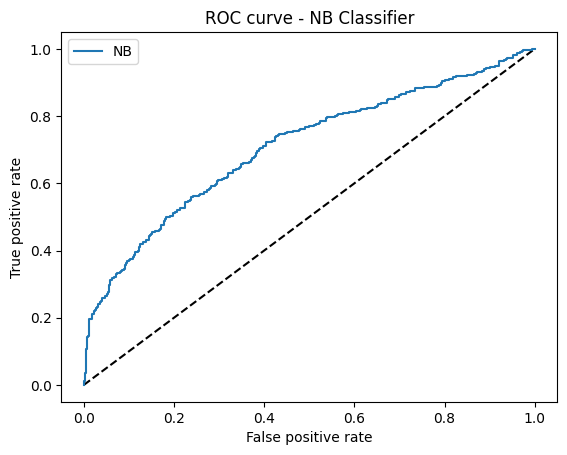

The AUC of NB Classifier is 0.7073477633477634


In [ ]:

# Use predict_proba to get the probability results of Gaussian Naive Bayes Classifier
y_pred_gb = best_NB_model.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='NB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - NB Classifier')
plt.legend(loc='best')
plt.show()
# AUC
print('The AUC of NB Classifier is', metrics.auc(fpr_gb,tpr_gb))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define the models with their best parameters
# Replace the parameters with the ones you've found best during hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "GB Classifier": GradientBoostingClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train each model and evaluate on the test set
accuracies = {}
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions and evaluate
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # Print the accuracy
    print(f"The accuracy of {name} is: {accuracy:.2f}")

# Comparing the accuracies
# Here you can sort the models based on their accuracies, or just print them out as is
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
for name, accuracy in sorted_accuracies:
    print(f"{name}: {accuracy:.2f}")


The accuracy of Logistic Regression is: 0.73
The accuracy of KNN is: 0.73
The accuracy of Random Forest is: 0.92
The accuracy of SVC is: 0.74
The accuracy of GB Classifier is: 0.76
The accuracy of Gaussian Naive Bayes is: 0.72
Random Forest: 0.92
GB Classifier: 0.76
SVC: 0.74
KNN: 0.73
Logistic Regression: 0.73
Gaussian Naive Bayes: 0.72


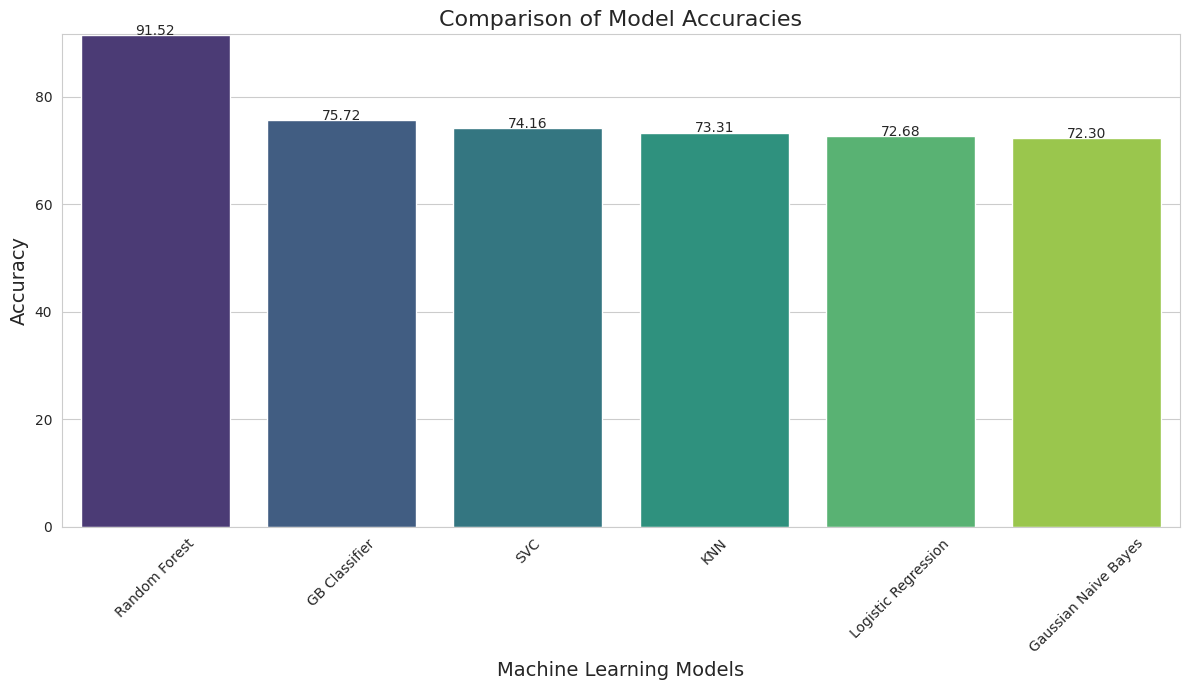

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'accuracies' dictionary from the previous model evaluations
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
model_names = [name for name, _ in sorted_accuracies]
model_accuracies = [accuracy * 100 for _, accuracy in sorted_accuracies]

# Styling
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(model_names))  # Using a vibrant color palette

# Create bar plot
bar_plot = sns.barplot(x=model_names, y=model_accuracies, palette=palette)

# Add data labels
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.2f}', ha="center")

# Set labels and title
plt.xlabel('Machine Learning Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xticks(rotation=45)

# Adjust the limits and layout
plt.ylim(0, max(model_accuracies) + 0.05)
plt.tight_layout()

# Show the plot
plt.show()
